In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

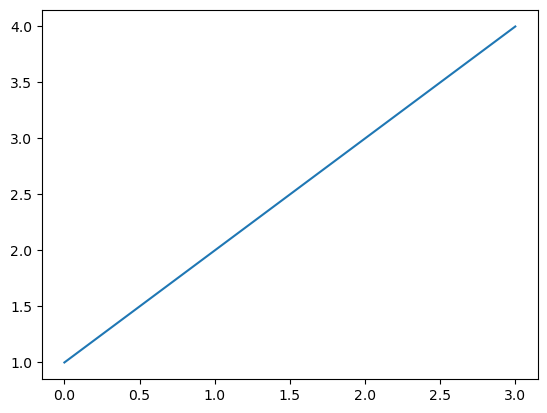

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [8]:
!pwd

/home/niusha/Documents/Codes/Hanganu_bootstrap_project/code


In [9]:
roi_df = pd.read_csv("../study_files/roi_data.csv", index_col=0)
roi_df.head()

,Study Date,Description,Imaging Protocol,EVENT_ID,PATNO,PRIMDIAG,OTHNEURO,AGE_AT_VISIT,SEX,BIRTHDT,...,Right-Accumbens-area_meanT1T2,Right-Accumbens-area_change_pred,Left-Accumbens-area_first_pred,Left-Accumbens-area_second_pred,Left-Accumbens-area_change,Left-Accumbens-area_meanT1T2,Left-Accumbens-area_change_pred,durationT2_T1_y,thickness_change,thickness_change_pct
0,6/12/2013,MPRAGE GRAPPA,Acquisition Plane=SAGITTAL;Field Strength=3.0;...,V04,3777,1,NaN,63.0,1,01/1950,...,-34.134558,23.987596,-16.225904,-18.691073,-2.465169,-17.458488,-2.374909,3.082883,0.012453,-1.581534
1,5/15/2013,MPRAGE GRAPPA,Acquisition Plane=SAGITTAL;Field Strength=3.0;...,V06,3107,1,NaN,71.7,1,09/1941,...,-26.314785,11.760080,-94.788635,-28.588956,66.199679,-61.688795,66.518608,1.998672,0.013867,-1.151417
2,12/06/2012,MPRAGE GRAPPA,Acquisition Plane=SAGITTAL;Field Strength=3.0;...,V06,3557,1,NaN,61.0,1,12/1951,...,176.436737,-75.743380,136.891671,78.691265,-58.200406,107.791468,-58.757685,2.168422,0.022041,-2.078437
3,1/14/2014,MPRAGE GRAPPA,Acquisition Plane=SAGITTAL;Field Strength=3.0;...,V04,3834,1,NaN,69.7,1,06/1944,...,-45.865052,-33.504822,149.828201,24.905254,-124.922947,87.366728,-125.374631,3.000746,0.001531,-0.183792
4,6/20/2021,3D-T1-weighted_SAGITAL,Acquisition Plane=SAGITTAL;Field Strength=3.0;...,BL,101279,1,NaN,69.9,1,07/1951,...,-99.218387,29.834644,-65.268562,-62.266879,3.001683,-63.767721,3.331360,1.333361,0.009776,-0.514048


In [19]:
a = (1,2)
a

(1, 2)

In [24]:
b=tuple(roi_df["AGE_AT_VISIT"].loc[roi_df["dx_group"] == "PD-MCI"])
b

(63.0, 71.7, 61.0, 69.7, 69.9, 61.6, 70.8, 79.2, 67.0, 62.3)

In [23]:
tuple(zip(a,b))

((1, 63.0), (2, 71.7))

In [22]:
roi_df.describe()

,PATNO,PRIMDIAG,OTHNEURO,AGE_AT_VISIT,SEX,EDUCYRS,COHORT,PDDXDT,COGSTATE,CMTRT,...,Right-Accumbens-area_meanT1T2,Right-Accumbens-area_change_pred,Left-Accumbens-area_first_pred,Left-Accumbens-area_second_pred,Left-Accumbens-area_change,Left-Accumbens-area_meanT1T2,Left-Accumbens-area_change_pred,durationT2_T1_y,thickness_change,thickness_change_pct
count,43.000000,43.000000,0.0,43.000000,43.000000,42.000000,43.000000,0.0,30.000000,0.0,...,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,43.000000,43.000000,43.000000
mean,21952.837209,7.697674,NaN,65.830233,0.813953,15.190476,1.418605,NaN,1.366667,NaN,...,-2.313395e-14,1.652425e-16,-1.361598e-13,6.609700e-16,1.381427e-13,-7.204573e-14,-1.549148e-15,1.525460,0.003738,-0.260776
std,37481.178255,7.986700,NaN,7.399020,0.393750,2.520531,0.499169,NaN,0.490133,NaN,...,1.104593e+02,4.195907e+01,1.122412e+02,1.127984e+02,4.622605e+01,1.101207e+02,4.622254e+01,0.555304,0.022489,1.389357
min,3107.000000,1.000000,NaN,42.800000,0.000000,11.000000,1.000000,NaN,1.000000,NaN,...,-2.295855e+02,-8.712425e+01,-2.222510e+02,-1.812598e+02,-1.249229e+02,-2.017554e+02,-1.253746e+02,0.585912,-0.062795,-3.351894
25%,3389.500000,1.000000,NaN,61.350000,1.000000,13.250000,1.000000,NaN,1.000000,NaN,...,-7.349443e+01,-2.440882e+01,-7.483637e+01,-7.886596e+01,-2.512823e+01,-8.365102e+01,-2.471190e+01,1.086949,-0.010664,-1.116810
50%,3777.000000,1.000000,NaN,67.300000,1.000000,16.000000,1.000000,NaN,1.000000,NaN,...,-1.488121e+01,-7.353741e+00,-2.920285e+01,-1.869107e+01,3.095822e+00,-1.825209e+01,3.331360e+00,1.327885,0.005569,-0.249708
75%,4025.000000,17.000000,NaN,70.950000,1.000000,16.000000,2.000000,NaN,2.000000,NaN,...,5.178139e+01,2.193879e+01,7.310494e+01,7.264838e+01,2.988453e+01,7.742308e+01,3.016035e+01,1.998672,0.015215,0.558940
max,110212.000000,17.000000,NaN,79.200000,1.000000,22.000000,2.000000,NaN,2.000000,NaN,...,3.171106e+02,1.231742e+02,2.490420e+02,2.697140e+02,9.332525e+01,2.593780e+02,9.311341e+01,3.082883,0.048261,3.719637


In [48]:
ROIs = [
    "Thalamus",
    "Caudate",
    "Putamen",
    "Pallidum",
    "Hippocampus",
    "Amygdala",
    "Accumbens-area",
]

target_columns = ["thickness_change"] + [region+"_change_pred" for region in ROIs]

In [49]:
#get specific columns of the dataframe
target_df = roi_df.loc[:, target_columns]
PD_MCI_df = target_df.loc[roi_df["dx_group"] == "PD-MCI"]
PD_non_MCI_df = target_df.loc[roi_df["dx_group"] == "PD-non-MCI"]
HC_df = target_df.loc[roi_df["dx_group"] == "HC"]


- Don't they need multiple comparison correction?
- Numbers are close but not the same. (this was because I used `pred_pct` columns instead of `pred`)

In [50]:
roi_df["dx_group"].value_counts()

HC            18
PD-non-MCI    15
PD-MCI        10
Name: dx_group, dtype: int64

In [51]:
n_regions = len(target_columns)

MCIvsHC_stats = np.zeros((n_regions, 1000, 2))
MCIvsnonMCI_stats = np.zeros((n_regions, 1000, 2))
nonMCIvsHC_stats = np.zeros((n_regions, 1000, 2))

PD_MCI_index = PD_MCI_df.index.tolist()
PD_non_MCI_index = PD_non_MCI_df.index.tolist()
HC_index = HC_df.index.tolist()

n_PD_MCI = len(PD_MCI_index)
n_PD_non_MCI = len(PD_non_MCI_index)
n_HC = len(HC_index)

In [52]:
n_regions

8

In [53]:
for itr in range(1000):

    MCI_sample = list(np.random.choice(PD_MCI_index, n_PD_MCI, replace=True))
    nonMCI_sample = list(np.random.choice(PD_non_MCI_index, n_PD_non_MCI, replace=True))
    HC_sample = list(np.random.choice(HC_index, n_HC, replace=True))

    for i in range(n_regions):
        region = target_columns[i]
        MCIvsnonMCI_stats[i][itr] = ttest_ind(PD_MCI_df[region].loc[MCI_sample], PD_non_MCI_df[region].loc[nonMCI_sample])
        nonMCIvsHC_stats[i][itr] = ttest_ind(HC_df[region].loc[HC_sample], PD_non_MCI_df[region].loc[nonMCI_sample])
        MCIvsHC_stats[i][itr] = ttest_ind(PD_MCI_df[region].loc[MCI_sample], HC_df[region].loc[HC_sample])


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

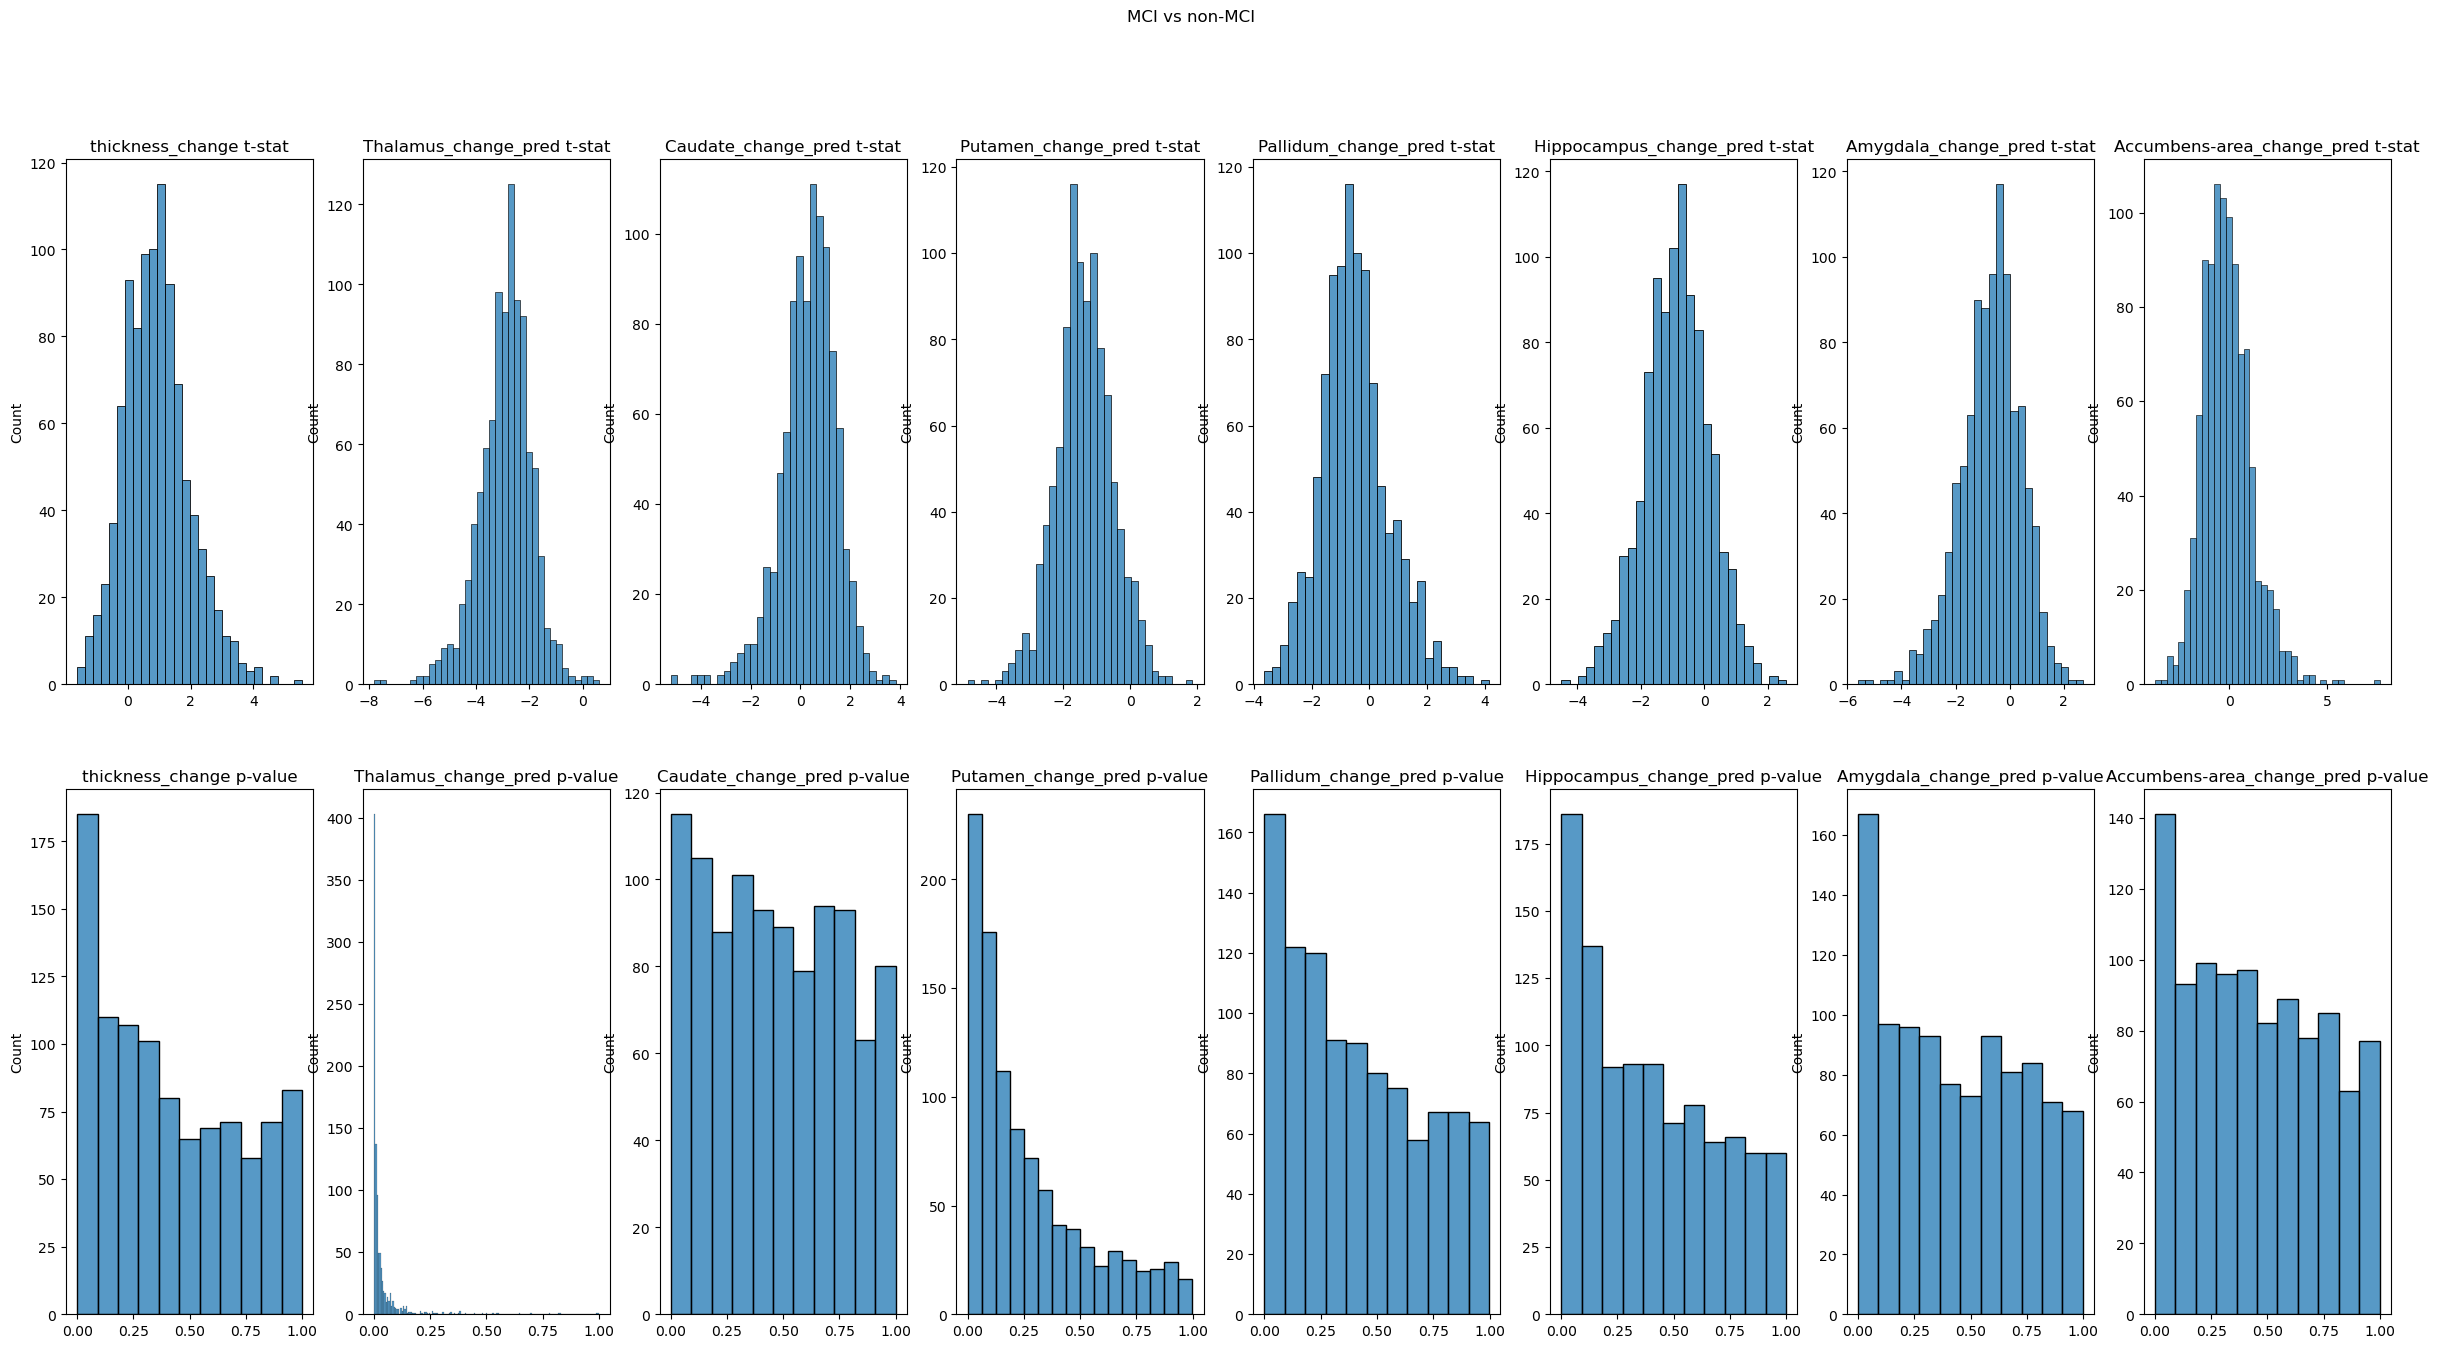

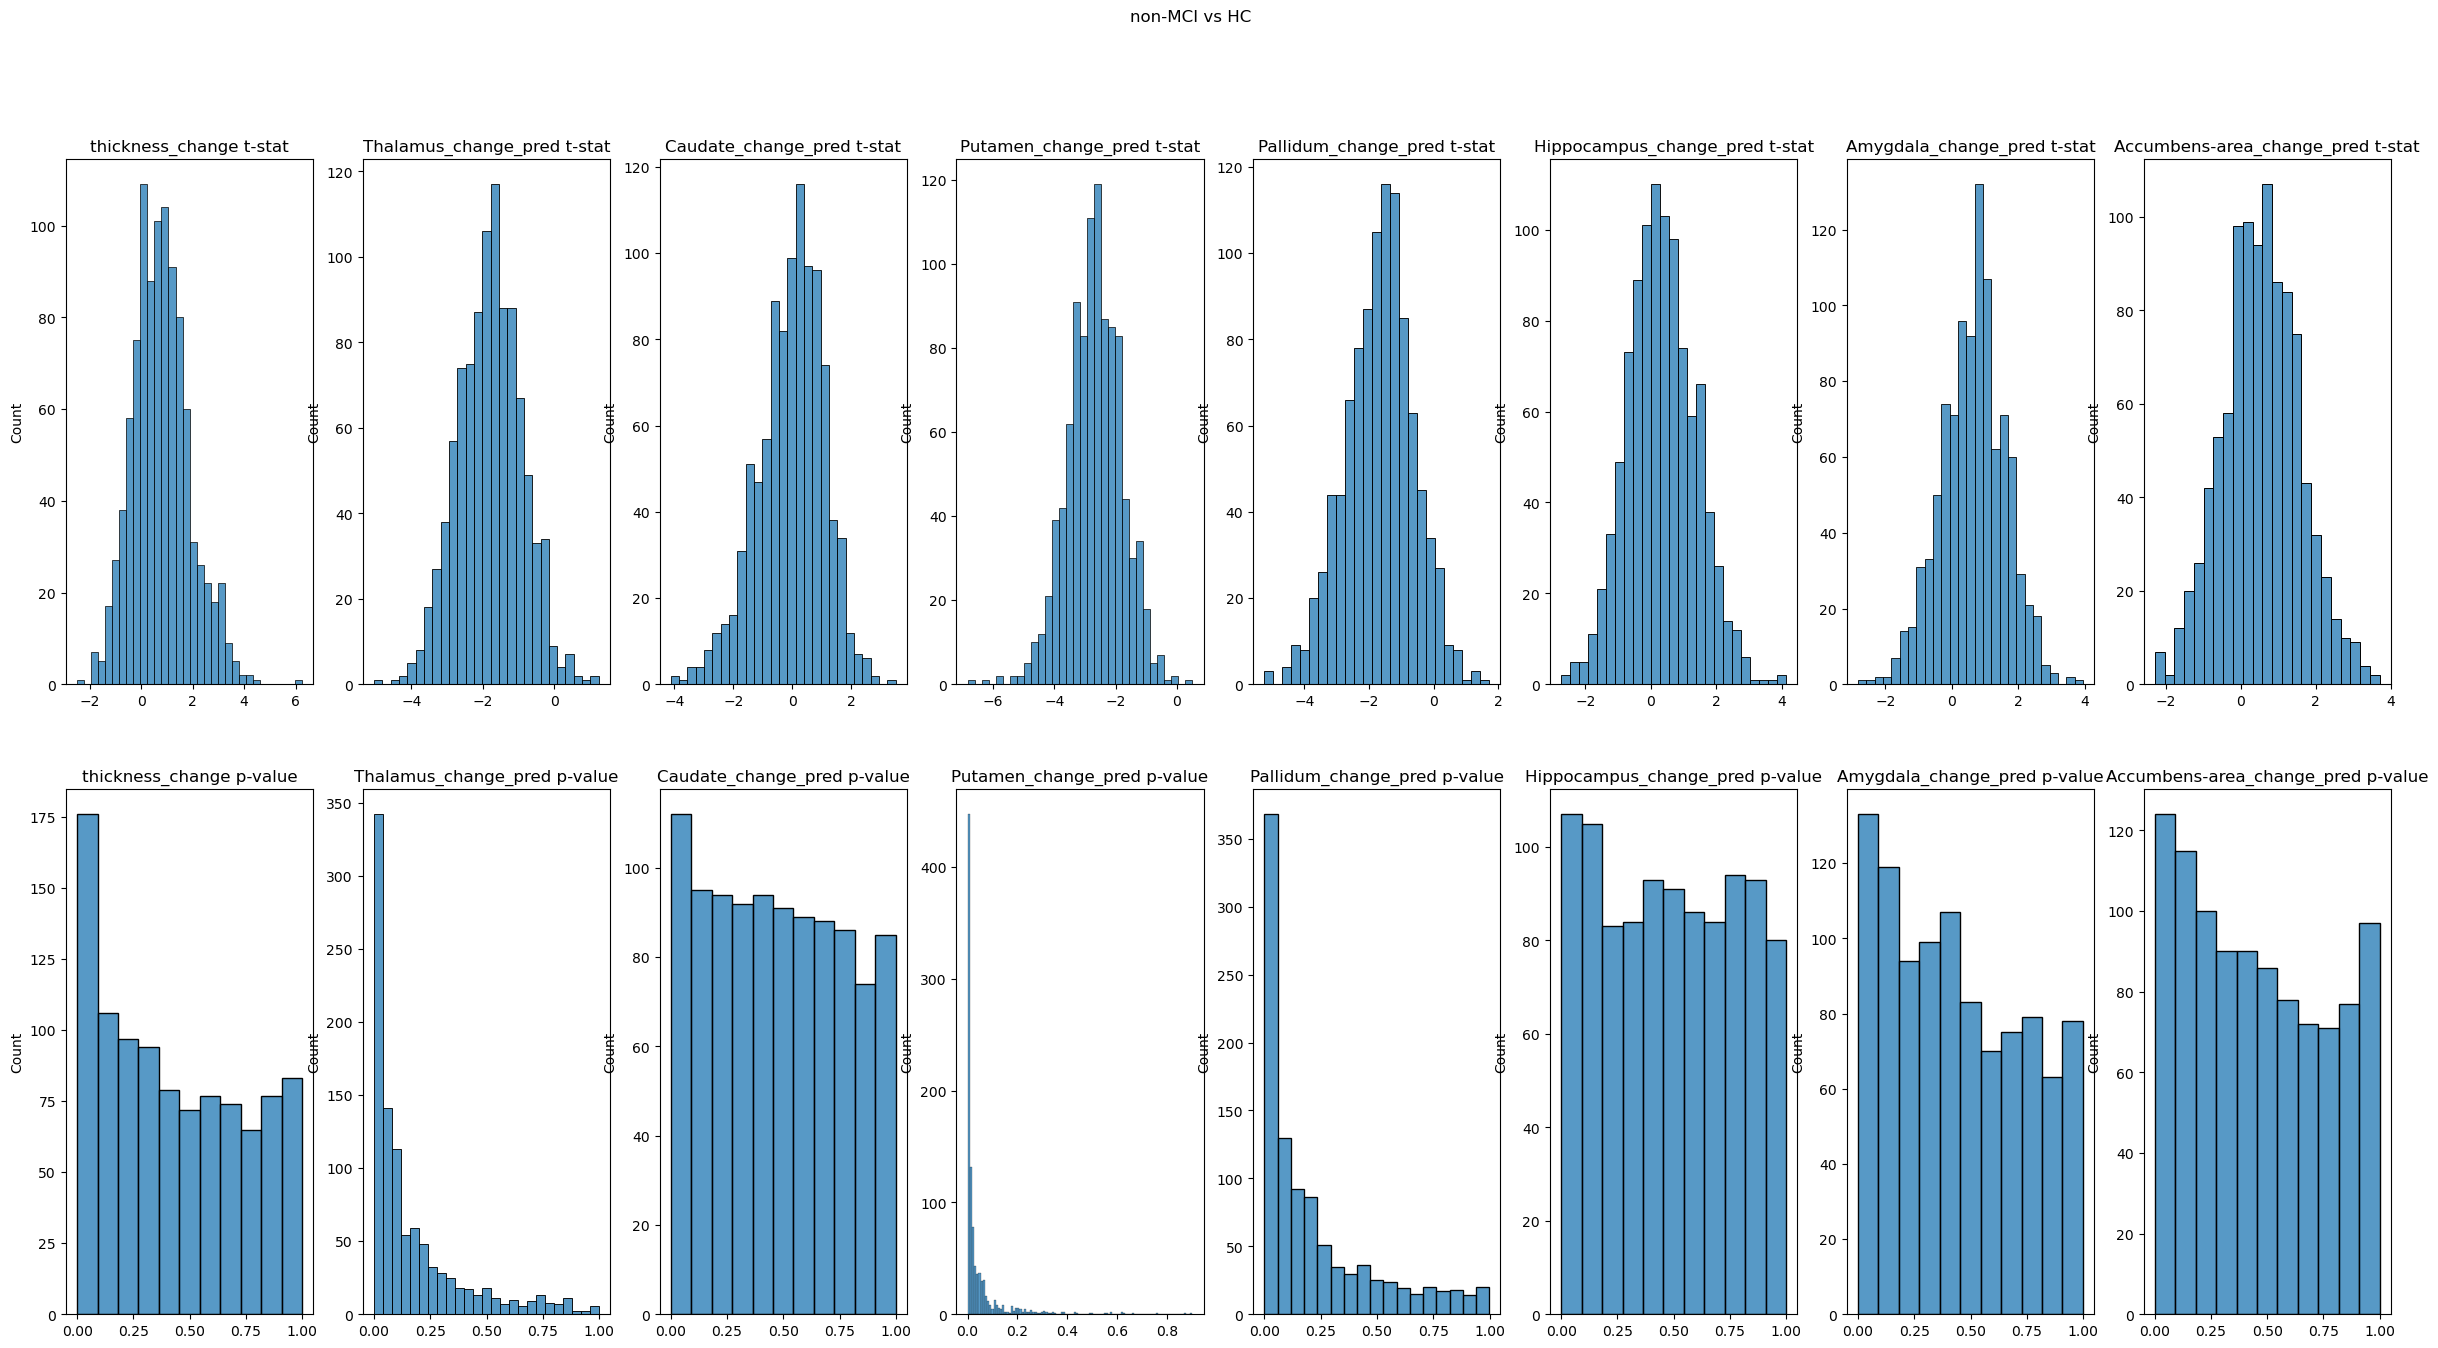

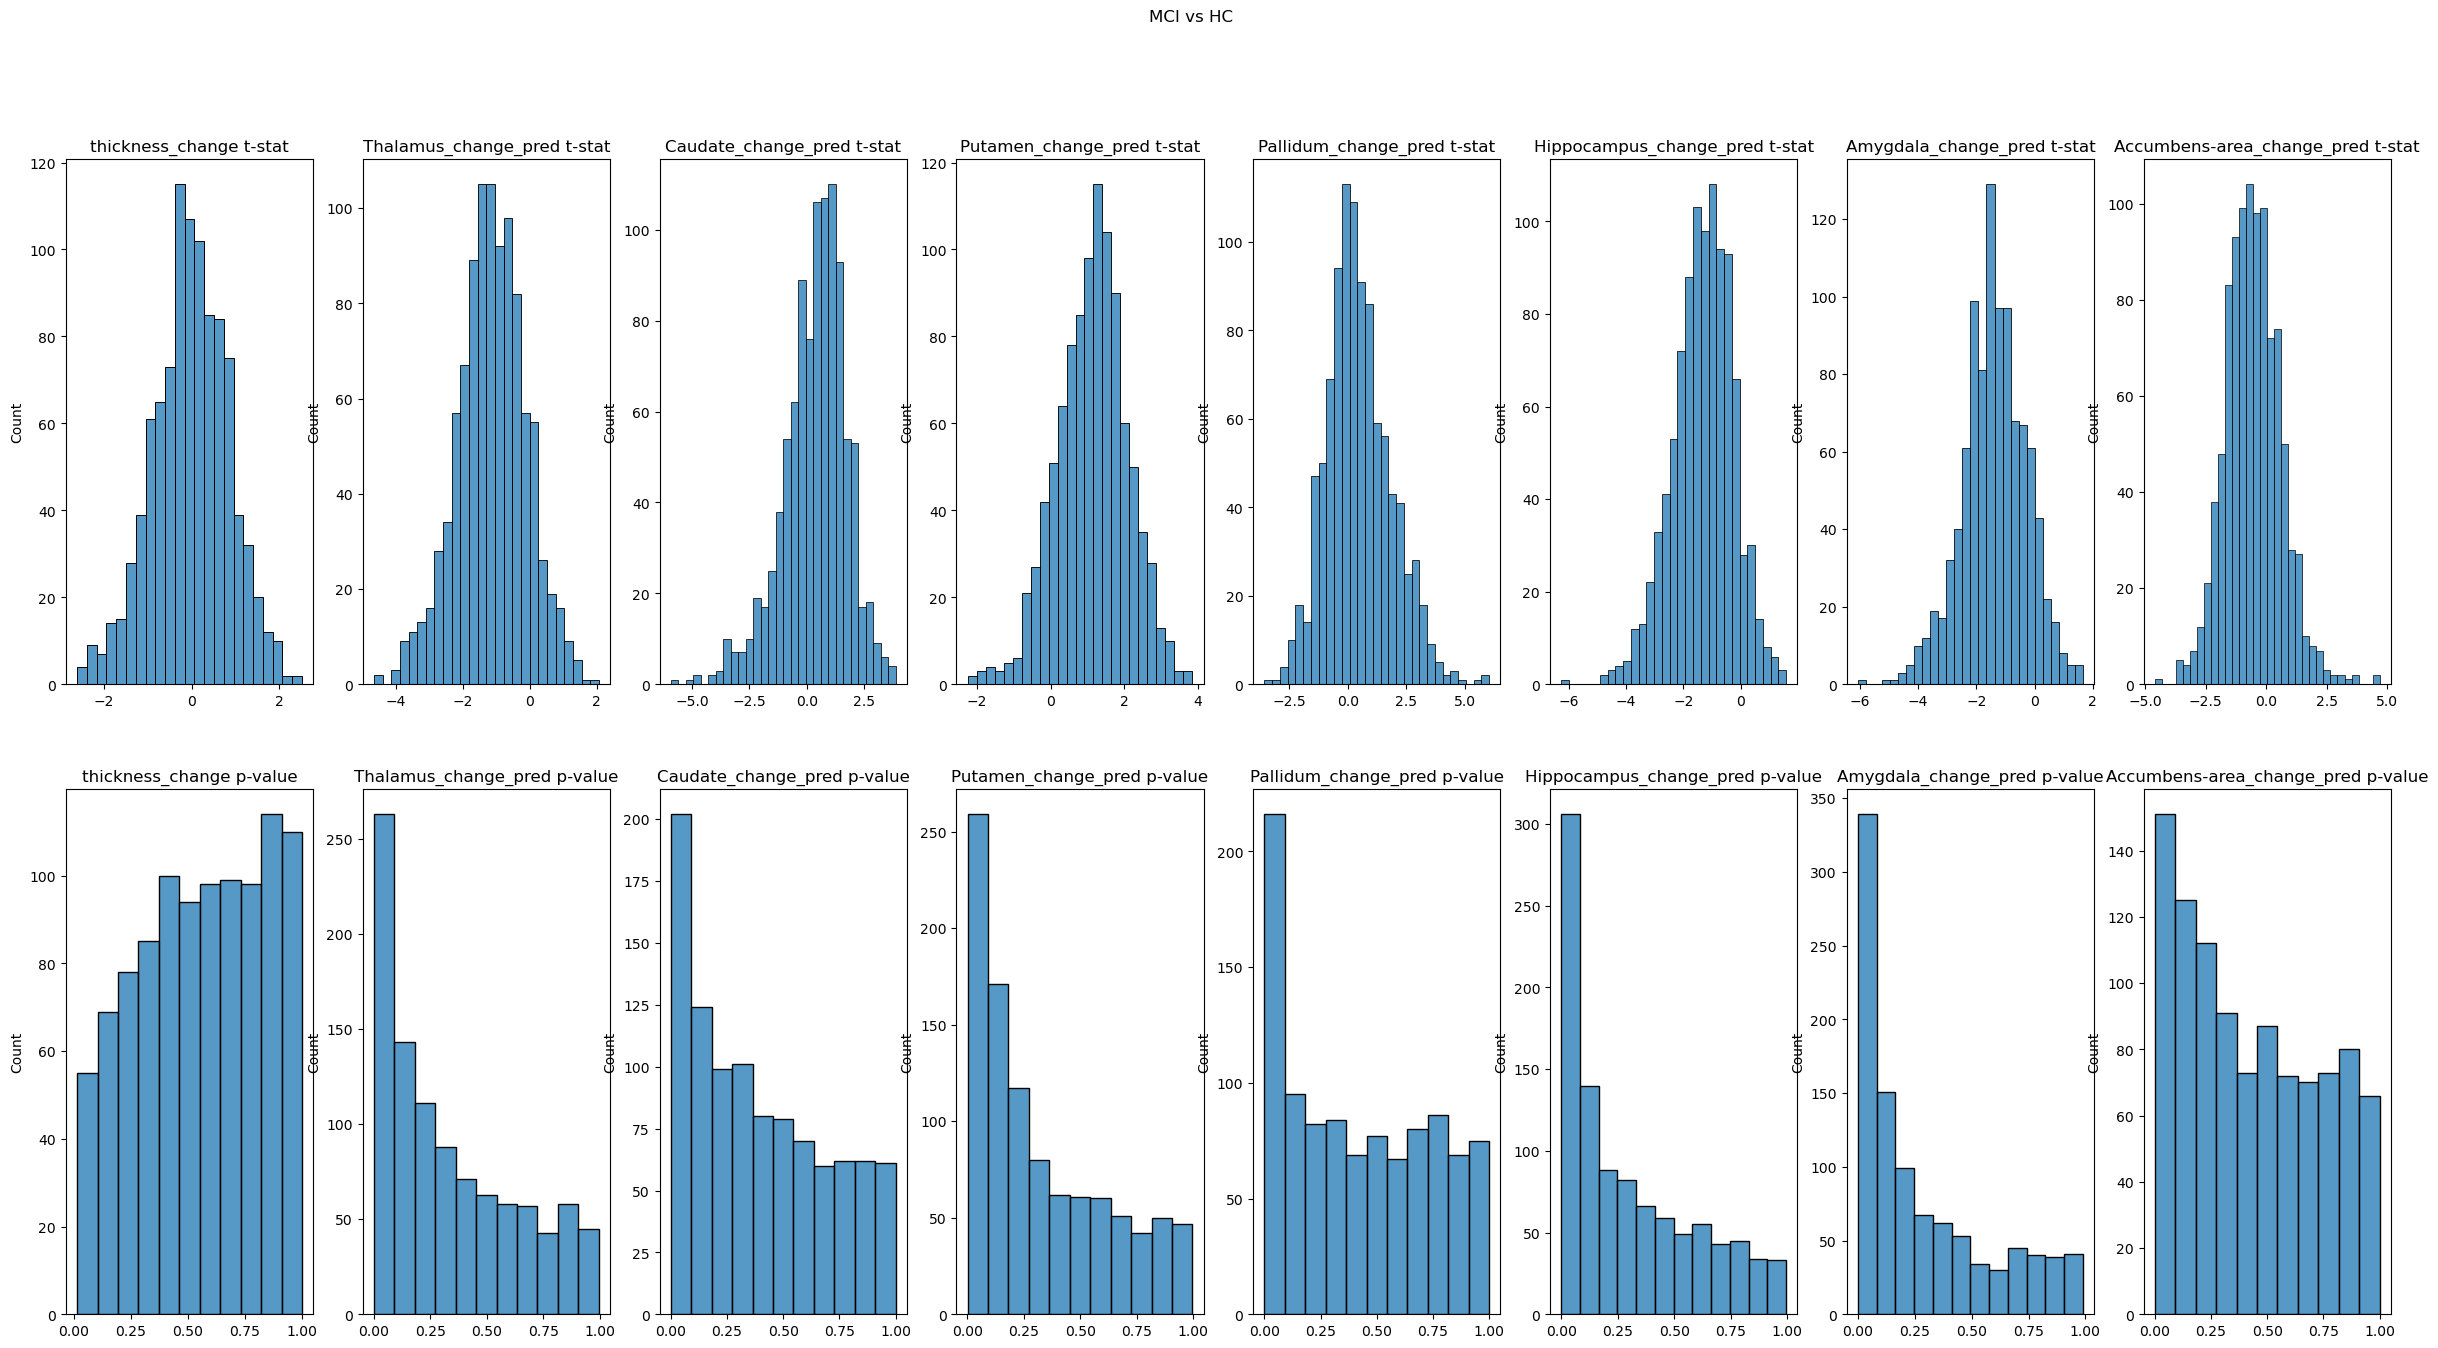

In [55]:
titles = ["MCI vs non-MCI", "non-MCI vs HC", "MCI vs HC"]
stats = [MCIvsnonMCI_stats, nonMCIvsHC_stats, MCIvsHC_stats]

for i in range(3):
    f, ax = plt.subplots(nrows=2, ncols=n_regions, figsize=(30, 15))
    f.suptitle(titles[i])
    for j in range(n_regions):
        ax[0,j].set_title(target_columns[j] + " t-stat")
        ax[0,j] = sns.histplot(stats[i][j, :, 0], ax=ax[0,j])
        ax[1,j].set_title(target_columns[j] + " p-value")
        ax[1,j] = sns.histplot(stats[i][j, :, 1], ax=ax[1,j])

In [12]:
# for j in range(n_regions):    
#     for i in range(3):
#         print(titles[i], target_columns[j], "t-stat:", np.mean(stats[i][j, :, 0]), "p-value:", np.mean(stats[i][j, :, 1]))

In [13]:
data = {titles[i]: stats[i][:,:,1].mean(axis=1) for i in range(3)}
df = pd.DataFrame(data)
df.index = target_columns

In [14]:
df

,MCI vs non-MCI,non-MCI vs HC,MCI vs HC
thickness_change,0.425428,0.416767,0.568921
Thalamus_change_pred,0.027746,0.169633,0.335556
Caudate_change_pred,0.448644,0.466373,0.393222
Putamen_change_pred,0.275822,0.045960,0.309967
Pallidum_change_pred,0.419678,0.228189,0.409736
Hippocampus_change_pred,0.407876,0.482538,0.296464
Amygdala_change_pred,0.424120,0.423498,0.291469
Accumbens-area_change_pred,0.457231,0.434959,0.410227


In [15]:
data = {titles[i]: np.median(stats[i][:,:,1],axis=1) for i in range(3)}
df = pd.DataFrame(data)
df.index = target_columns

In [16]:
df

,MCI vs non-MCI,non-MCI vs HC,MCI vs HC
thickness_change,0.403467,0.383619,0.588102
Thalamus_change_pred,0.007773,0.064798,0.255898
Caudate_change_pred,0.415665,0.455398,0.338797
Putamen_change_pred,0.174470,0.011049,0.218869
Pallidum_change_pred,0.373801,0.108579,0.361621
Hippocampus_change_pred,0.362184,0.492238,0.187595
Amygdala_change_pred,0.389653,0.389520,0.182354
Accumbens-area_change_pred,0.435817,0.403451,0.371359


In [17]:
target_columns.pop(0)

'thickness_change'

In [18]:
target_correlation = ["MCATOT_diff"]
for side in ["Left-", "Right-"]:
    for region in target_columns:
        target_correlation.append(side+region)

In [19]:
target_correlation

['MCATOT_diff',
 'Left-Thalamus_change_pred',
 'Left-Caudate_change_pred',
 'Left-Putamen_change_pred',
 'Left-Pallidum_change_pred',
 'Left-Hippocampus_change_pred',
 'Left-Amygdala_change_pred',
 'Left-Accumbens-area_change_pred',
 'Right-Thalamus_change_pred',
 'Right-Caudate_change_pred',
 'Right-Putamen_change_pred',
 'Right-Pallidum_change_pred',
 'Right-Hippocampus_change_pred',
 'Right-Amygdala_change_pred',
 'Right-Accumbens-area_change_pred']

In [20]:
n_target_correlation = len(target_correlation)
target_corr_df = roi_df.loc[PD_MCI_index + PD_non_MCI_index][target_correlation]

In [21]:
target_corr_df

,MCATOT_diff,Left-Thalamus_change_pred,Left-Caudate_change_pred,Left-Putamen_change_pred,Left-Pallidum_change_pred,Left-Hippocampus_change_pred,Left-Amygdala_change_pred,Left-Accumbens-area_change_pred,Right-Thalamus_change_pred,Right-Caudate_change_pred,Right-Putamen_change_pred,Right-Pallidum_change_pred,Right-Hippocampus_change_pred,Right-Amygdala_change_pred,Right-Accumbens-area_change_pred
0,0.0,-338.972364,-102.744504,-120.216881,49.829713,-80.761183,-83.989064,-2.374909,-380.113964,-72.965330,-35.594857,-61.391558,-122.193717,-162.896056,23.987596
1,-5.0,-26.987301,-60.188294,-28.276075,-36.062727,10.506167,-27.267198,66.518608,-59.241516,-136.624953,64.729076,2.540188,-63.760316,113.308985,11.760080
2,-3.0,-303.965050,216.797471,-8.263377,24.798579,2.968788,-16.153489,-58.757685,-150.158728,278.768253,-28.406013,73.670288,-23.306356,49.778933,-75.743380
3,-1.0,-212.342312,469.108889,409.023487,45.599395,-142.231078,-62.072238,-125.374631,-344.222888,124.843645,-22.141660,221.928803,-77.477546,35.010611,-33.504822
4,3.0,-221.504132,-105.287468,-79.547251,5.115033,-56.252886,-1.387287,3.331360,-125.594682,-22.804785,36.712358,-71.291984,-109.168589,71.858709,29.834644
5,3.0,-19.161845,-108.444997,55.019095,-77.225584,-111.220447,46.242610,42.034197,-156.632348,-40.363482,19.387421,220.479017,-12.927258,-106.239814,14.303015
6,0.0,74.372176,-85.956216,-53.860435,22.220163,56.527422,39.422138,28.658559,306.508472,-53.493339,-127.396699,-600.158736,47.908444,-14.303339,23.671215
7,0.0,-168.495586,23.241073,-83.932051,-44.588200,-85.209693,-154.299409,11.194646,-104.093715,-100.167016,-47.376873,173.601350,-16.015340,-94.393879,-6.809535
8,-1.0,-49.045132,-43.963616,66.149619,-42.285764,75.966108,-98.194810,68.352963,-142.046602,90.840445,-141.848127,67.455147,45.843938,-74.862905,-15.072985
9,2.0,53.588982,74.737215,-120.671993,63.717325,173.062458,37.895995,-65.057737,114.333675,9.617132,94.519424,-153.480057,-16.547022,113.972927,-24.822059


In [22]:
MCI_corr = np.zeros((n_target_correlation-1, 1000, 2))
non_MCI_corr = np.zeros((n_target_correlation-1, 1000, 2))
PD_corr = np.zeros((n_target_correlation-1, 1000, 2))

In [23]:
from scipy.stats import pearsonr

In [24]:
for itr in range(1000):
    MCI_sample = list(np.random.choice(PD_MCI_index, n_PD_MCI, replace=True))
    non_MCI_sample = list(np.random.choice(PD_non_MCI_index, n_PD_non_MCI, replace=True))
    PD_sample = list(np.random.choice(PD_MCI_index+PD_non_MCI_index, n_PD_MCI+n_PD_non_MCI, replace=True))

    for i in range(1,n_target_correlation):
        region = target_correlation[i]
        MCI_corr[i-1][itr] = pearsonr(target_corr_df[region].loc[MCI_sample], target_corr_df["MCATOT_diff"].loc[MCI_sample])
        non_MCI_corr[i-1][itr] = pearsonr(target_corr_df[region].loc[non_MCI_sample], target_corr_df["MCATOT_diff"].loc[non_MCI_sample])
        PD_corr[i-1][itr] = pearsonr(target_corr_df[region].loc[PD_sample], target_corr_df["MCATOT_diff"].loc[PD_sample])

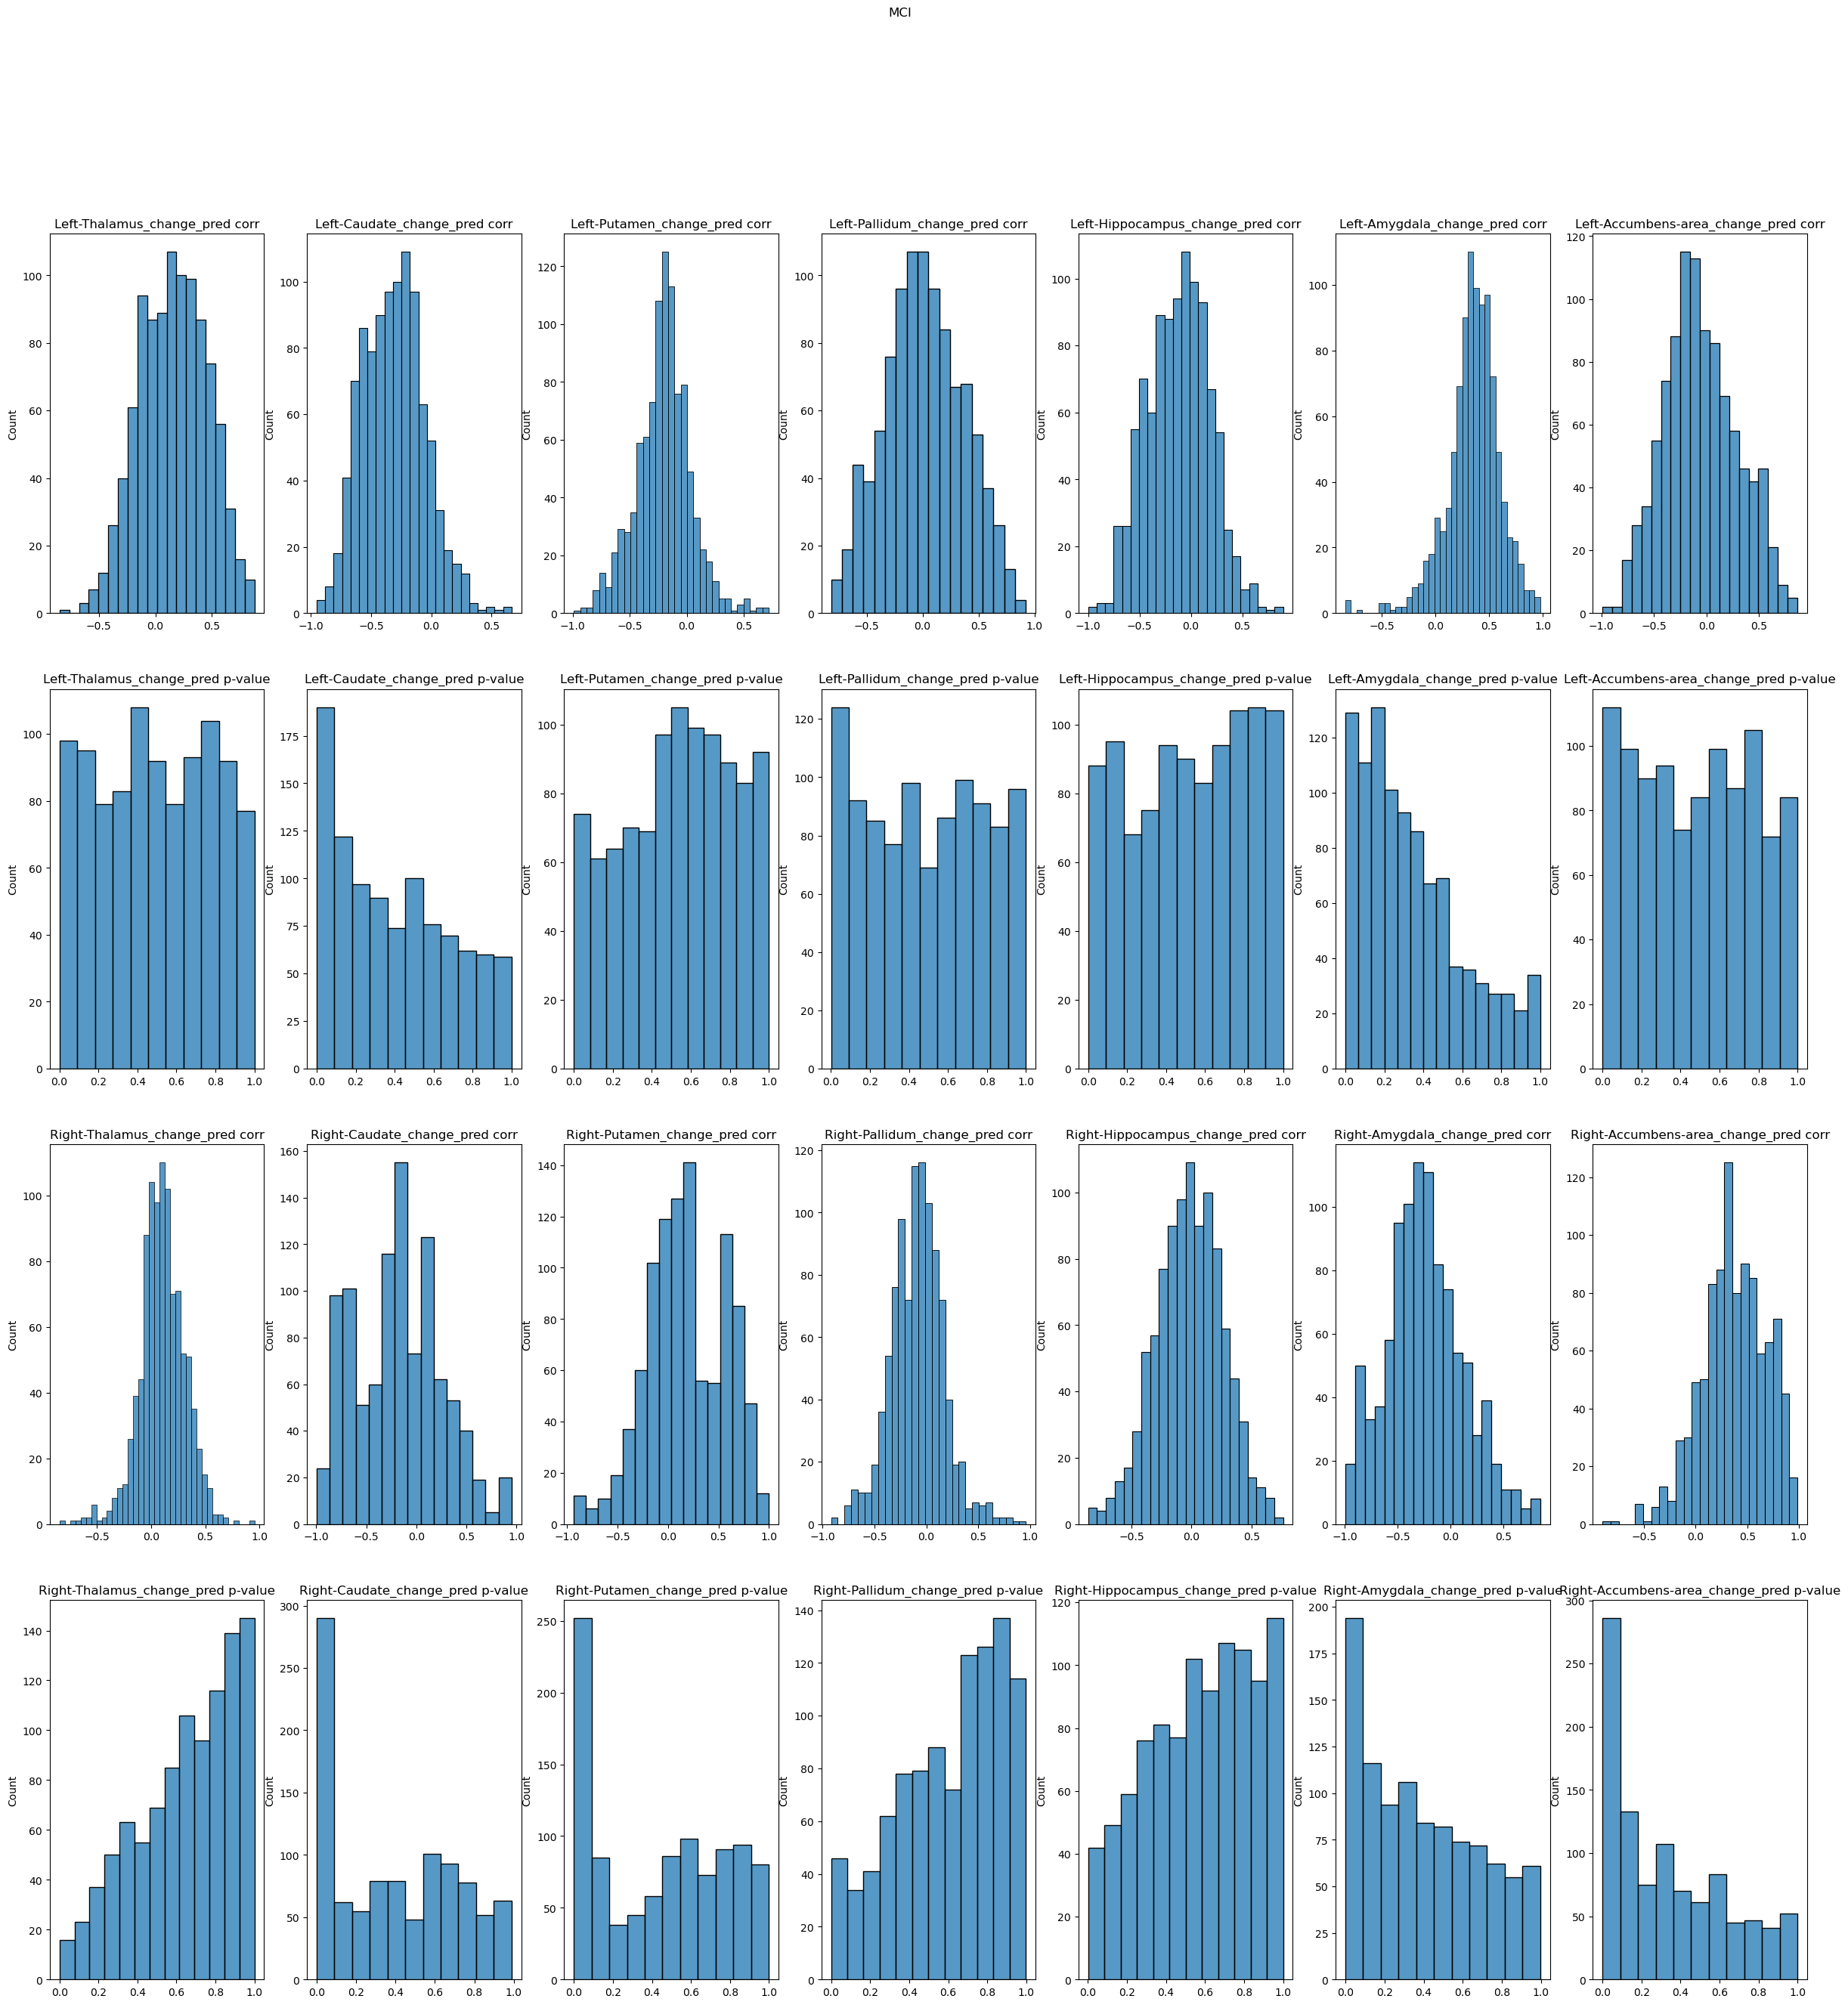

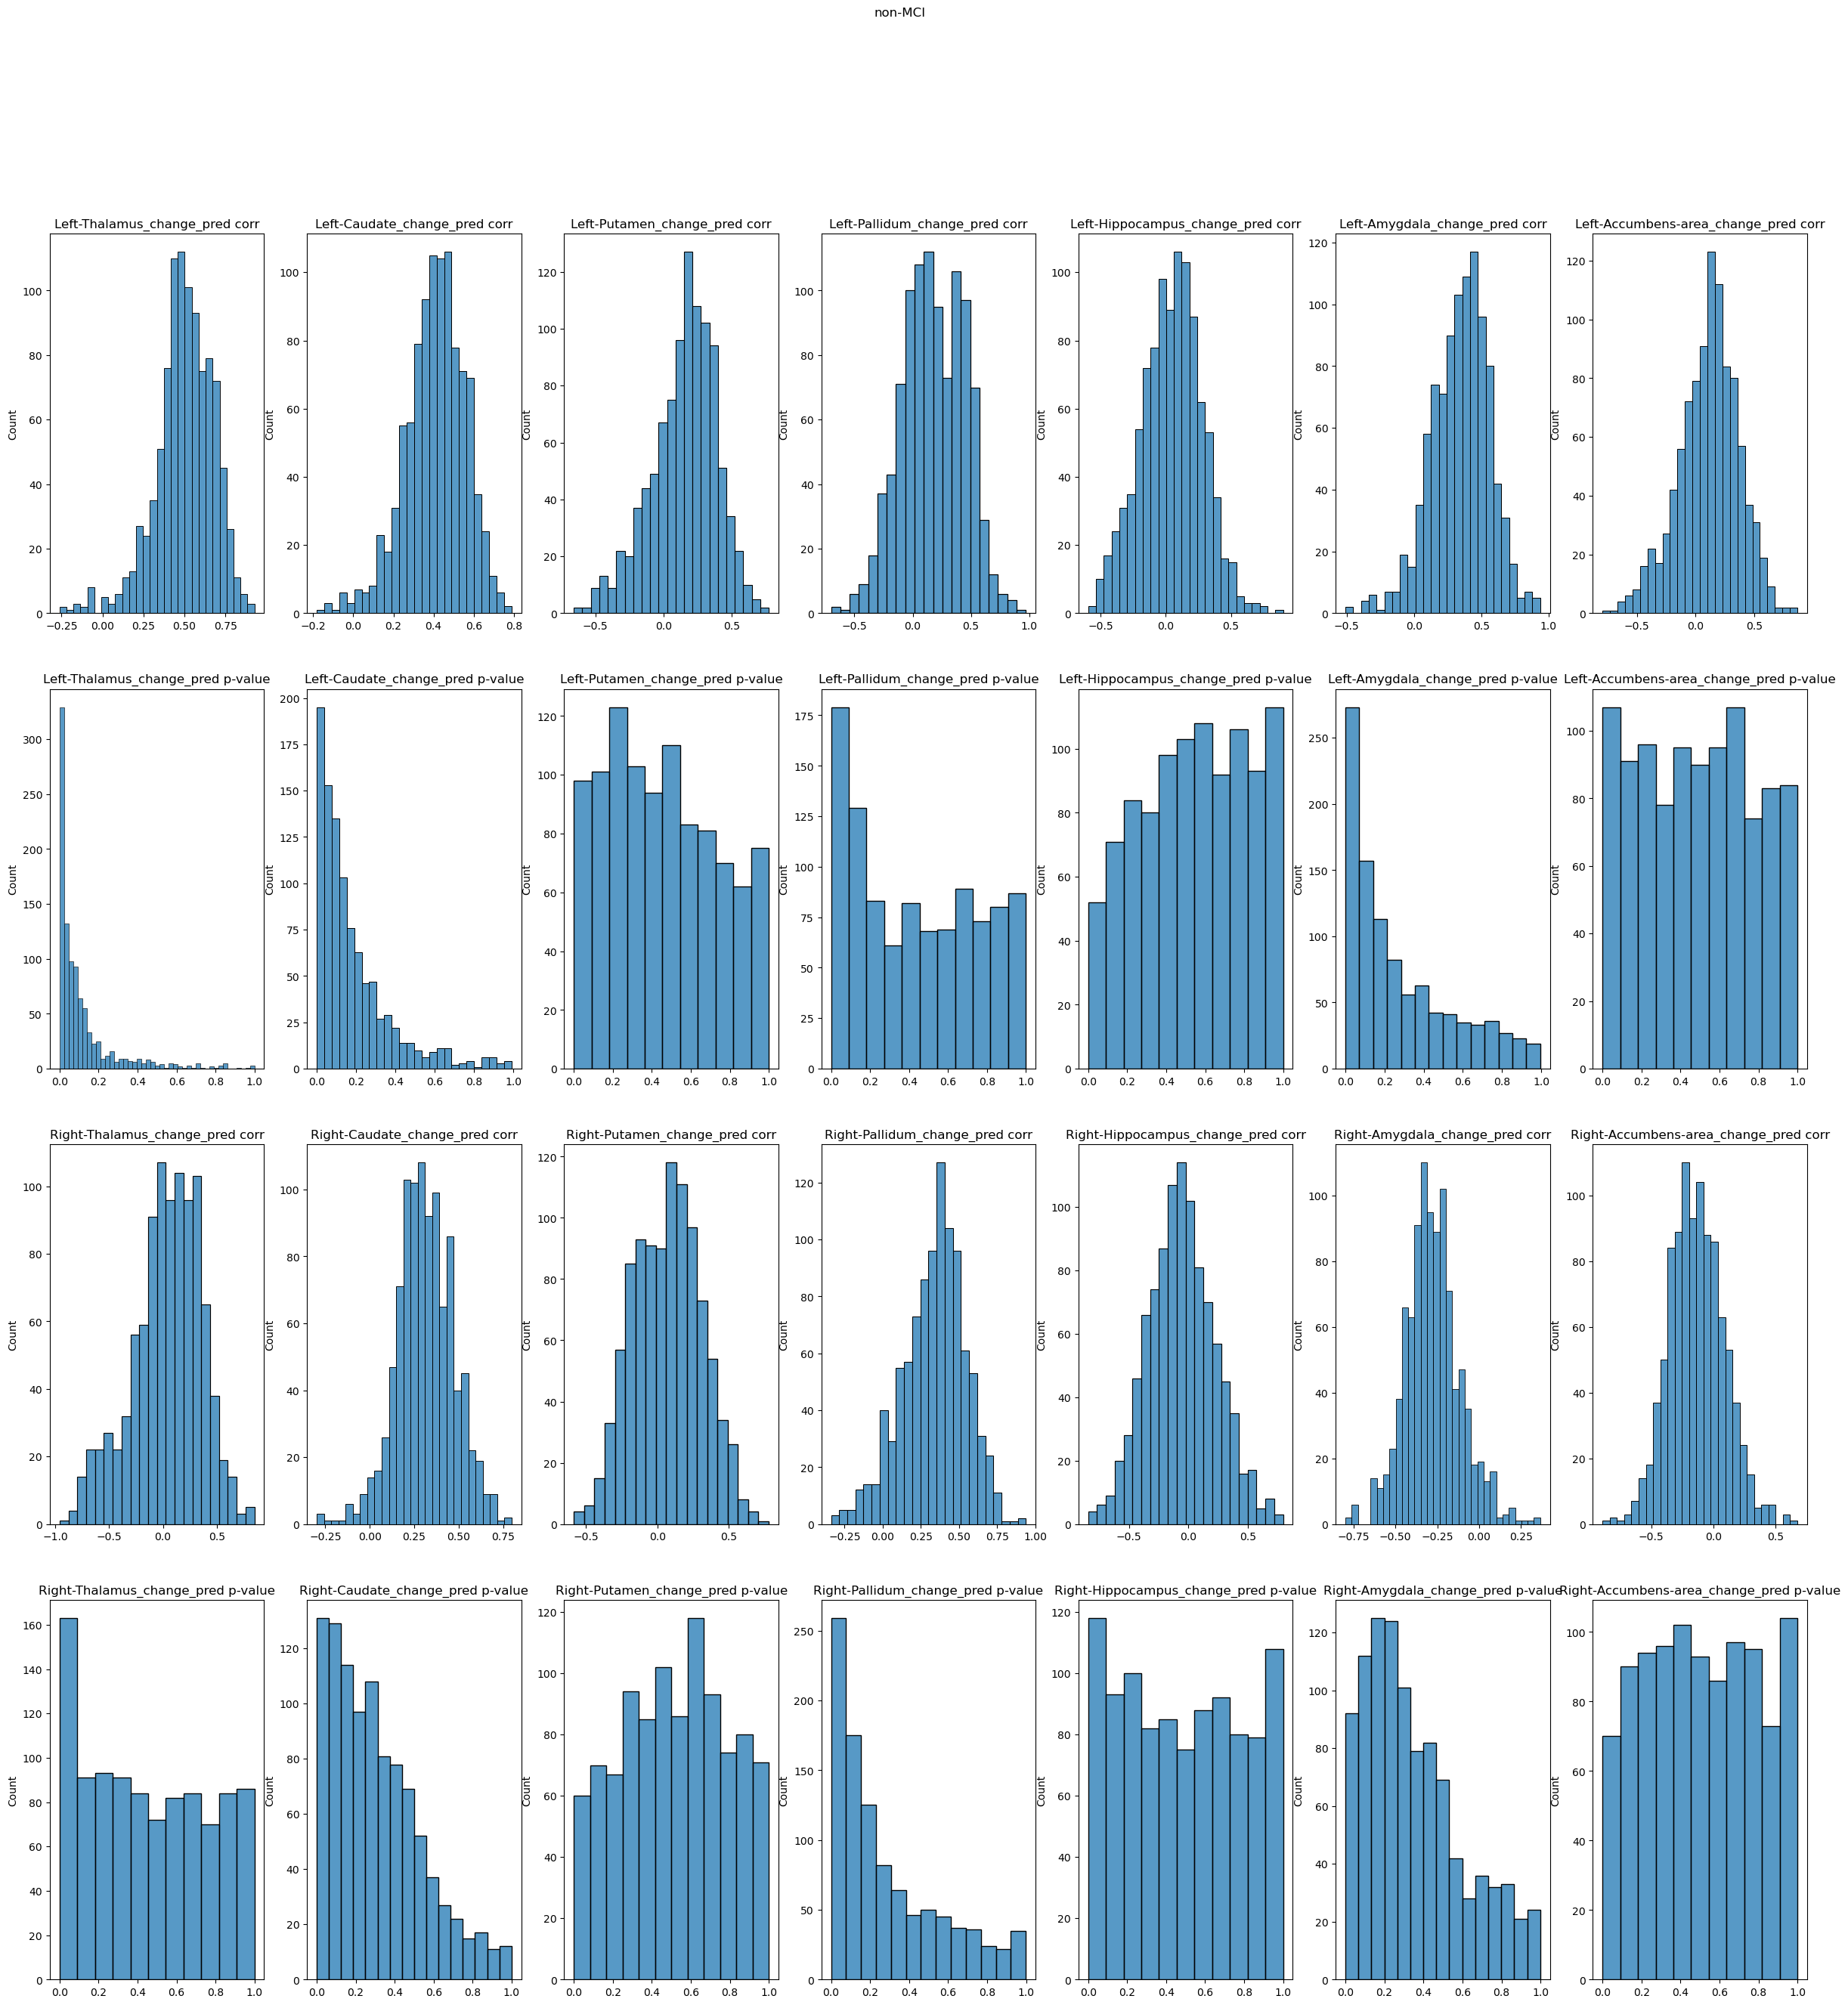

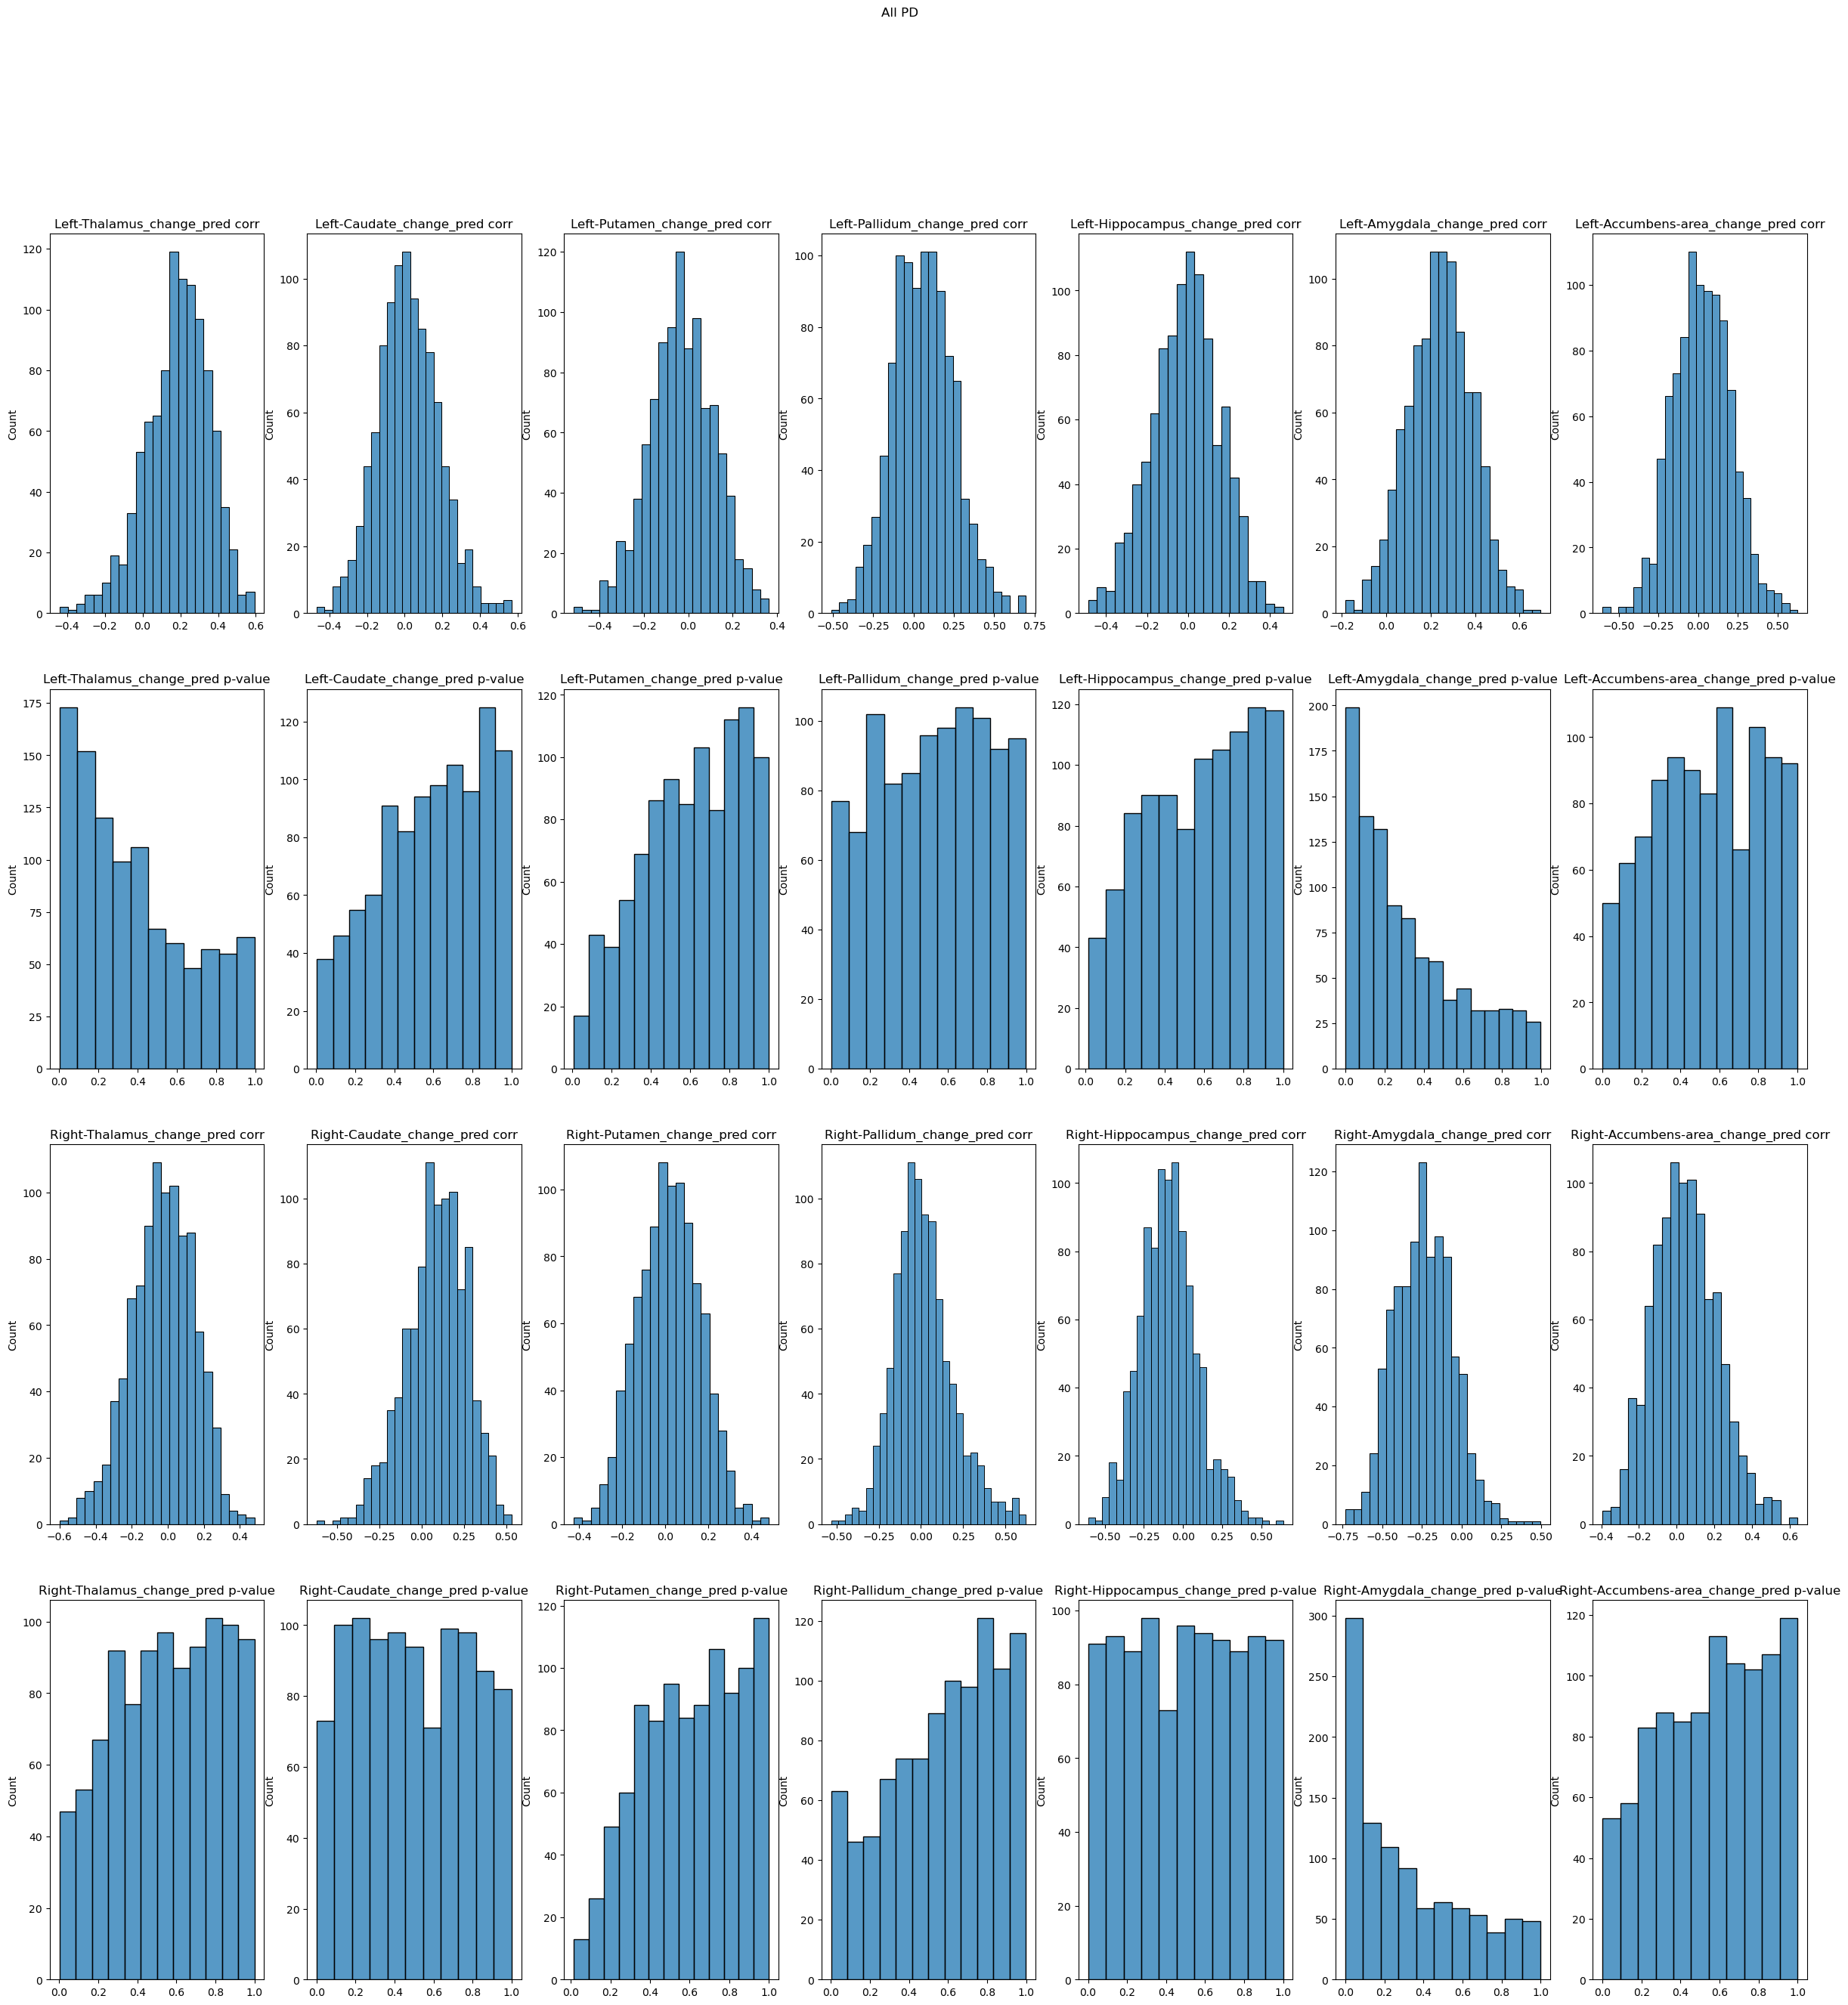

In [25]:
corr_result = [MCI_corr, non_MCI_corr, PD_corr]
corr_title = ["MCI", "non-MCI", "All PD"]
for cohort_idx in range(3):
    f, ax = plt.subplots(nrows=4, ncols=7, figsize=(30, 30))
    f.suptitle(corr_title[cohort_idx])
    for j in range(int((n_target_correlation-1)/2)):
        for i,k in zip([0,2], [0,7]):
            ax[i,j].set_title(target_correlation[j+1+k]+ " corr")
            ax[i,j] = sns.histplot(corr_result[cohort_idx][j+k, :, 0], ax=ax[i,j])
            ax[i+1,j].set_title(target_correlation[j+1+k] + " p-value")
            ax[i+1,j] = sns.histplot(corr_result[cohort_idx][j+k, :, 1], ax=ax[i+1,j])


In [26]:
k=1

In [27]:
stats_names = ["corr", "p-value"]
corr_summary = {corr_title[i] + " " + stats_names[j]: np.median(corr_result[i][:,:,j],axis=1) for i in range(3) for j in range(2)}
df_corr_summary = pd.DataFrame(corr_summary)
df_corr_summary.index = target_correlation[1:]

In [28]:
df_corr_summary

,MCI corr,MCI p-value,non-MCI corr,non-MCI p-value,All PD corr,All PD p-value
Left-Thalamus_change_pred,0.164465,0.487006,0.507620,0.053402,0.199240,0.314858
Left-Caudate_change_pred,-0.312019,0.366082,0.417462,0.121561,0.016869,0.617073
Left-Putamen_change_pred,-0.196059,0.558353,0.182200,0.435066,-0.029263,0.627378
Left-Pallidum_change_pred,0.010399,0.479904,0.168325,0.419164,0.053766,0.536129
Left-Hippocampus_change_pred,-0.101006,0.537831,0.058102,0.555350,-0.006346,0.605783
Left-Amygdala_change_pred,0.367704,0.287793,0.361985,0.183663,0.245123,0.237606
Left-Accumbens-area_change_pred,-0.087759,0.491785,0.126523,0.490866,0.023735,0.550426
Right-Thalamus_change_pred,0.098122,0.684763,0.059630,0.429659,-0.024094,0.558664
Right-Caudate_change_pred,-0.181059,0.375774,0.307006,0.265696,0.094423,0.486419
Right-Putamen_change_pred,0.161752,0.478239,0.079841,0.518008,0.015344,0.624302


In [29]:
stats_names = ["corr", "p-value"]
corr_summary = {corr_title[i] + " " + stats_names[j]: np.mean(corr_result[i][:,:,j],axis=1) for i in range(3) for j in range(2)}
df_corr_summary = pd.DataFrame(corr_summary)
df_corr_summary.index = target_correlation[1:]
df_corr_summary

,MCI corr,MCI p-value,non-MCI corr,non-MCI p-value,All PD corr,All PD p-value
Left-Thalamus_change_pred,0.160529,0.495359,0.498947,0.113657,0.185883,0.382665
Left-Caudate_change_pred,-0.312015,0.403513,0.407754,0.183531,0.018813,0.586459
Left-Putamen_change_pred,-0.204075,0.532758,0.148197,0.454646,-0.030413,0.604873
Left-Pallidum_change_pred,0.015973,0.485972,0.175819,0.440765,0.060016,0.518584
Left-Hippocampus_change_pred,-0.119448,0.523688,0.045589,0.544612,-0.011012,0.572348
Left-Amygdala_change_pred,0.351636,0.342584,0.343391,0.278663,0.242481,0.316429
Left-Accumbens-area_change_pred,-0.055135,0.479945,0.111242,0.486001,0.026064,0.538239
Right-Thalamus_change_pred,0.103883,0.647565,0.033804,0.451942,-0.029440,0.551004
Right-Caudate_change_pred,-0.178636,0.394083,0.312186,0.308401,0.084758,0.497804
Right-Putamen_change_pred,0.180118,0.445244,0.068565,0.513891,0.017616,0.606992


In [30]:
np.median(corr_result[2][:,:,0],axis=1).shape

(14,)

In [31]:
np.quantile(corr_result[1][3,:,1], 1)

0.9991959733079664

In [32]:
# a,_ = np.histogram(corr_result[1][0,:,1], 20)
a,_ = np.histogram(corr_result[0][2,:,1], 20)
# a,_ = np.histogram(corr_result[1][5,:,1], 20)
# a,_ = np.histogram(corr_result[0][1,:,1], 20)
# a,_ = np.histogram(corr_result[0][6,:,1], 20)

In [33]:
a


array([53, 36, 37, 33, 40, 40, 47, 39, 45, 65, 58, 67, 66, 49, 61, 67, 37,
       49, 54, 57])

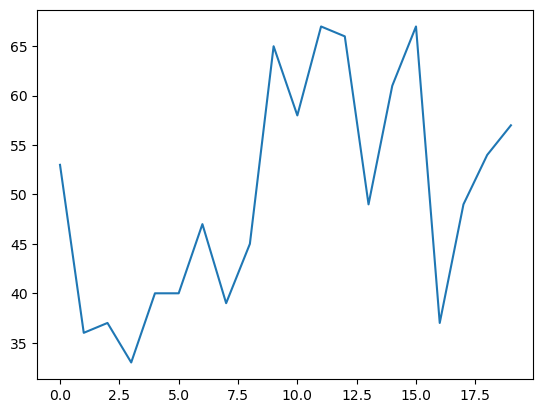

In [34]:
plt.plot(a)

In [35]:
b = np.ones(100) * 10

In [36]:
from scipy.stats import chisquare
st, p = chisquare(a, f_exp=None)

In [37]:
p

0.00013284935668506228

In [38]:
a

array([53, 36, 37, 33, 40, 40, 47, 39, 45, 65, 58, 67, 66, 49, 61, 67, 37,
       49, 54, 57])

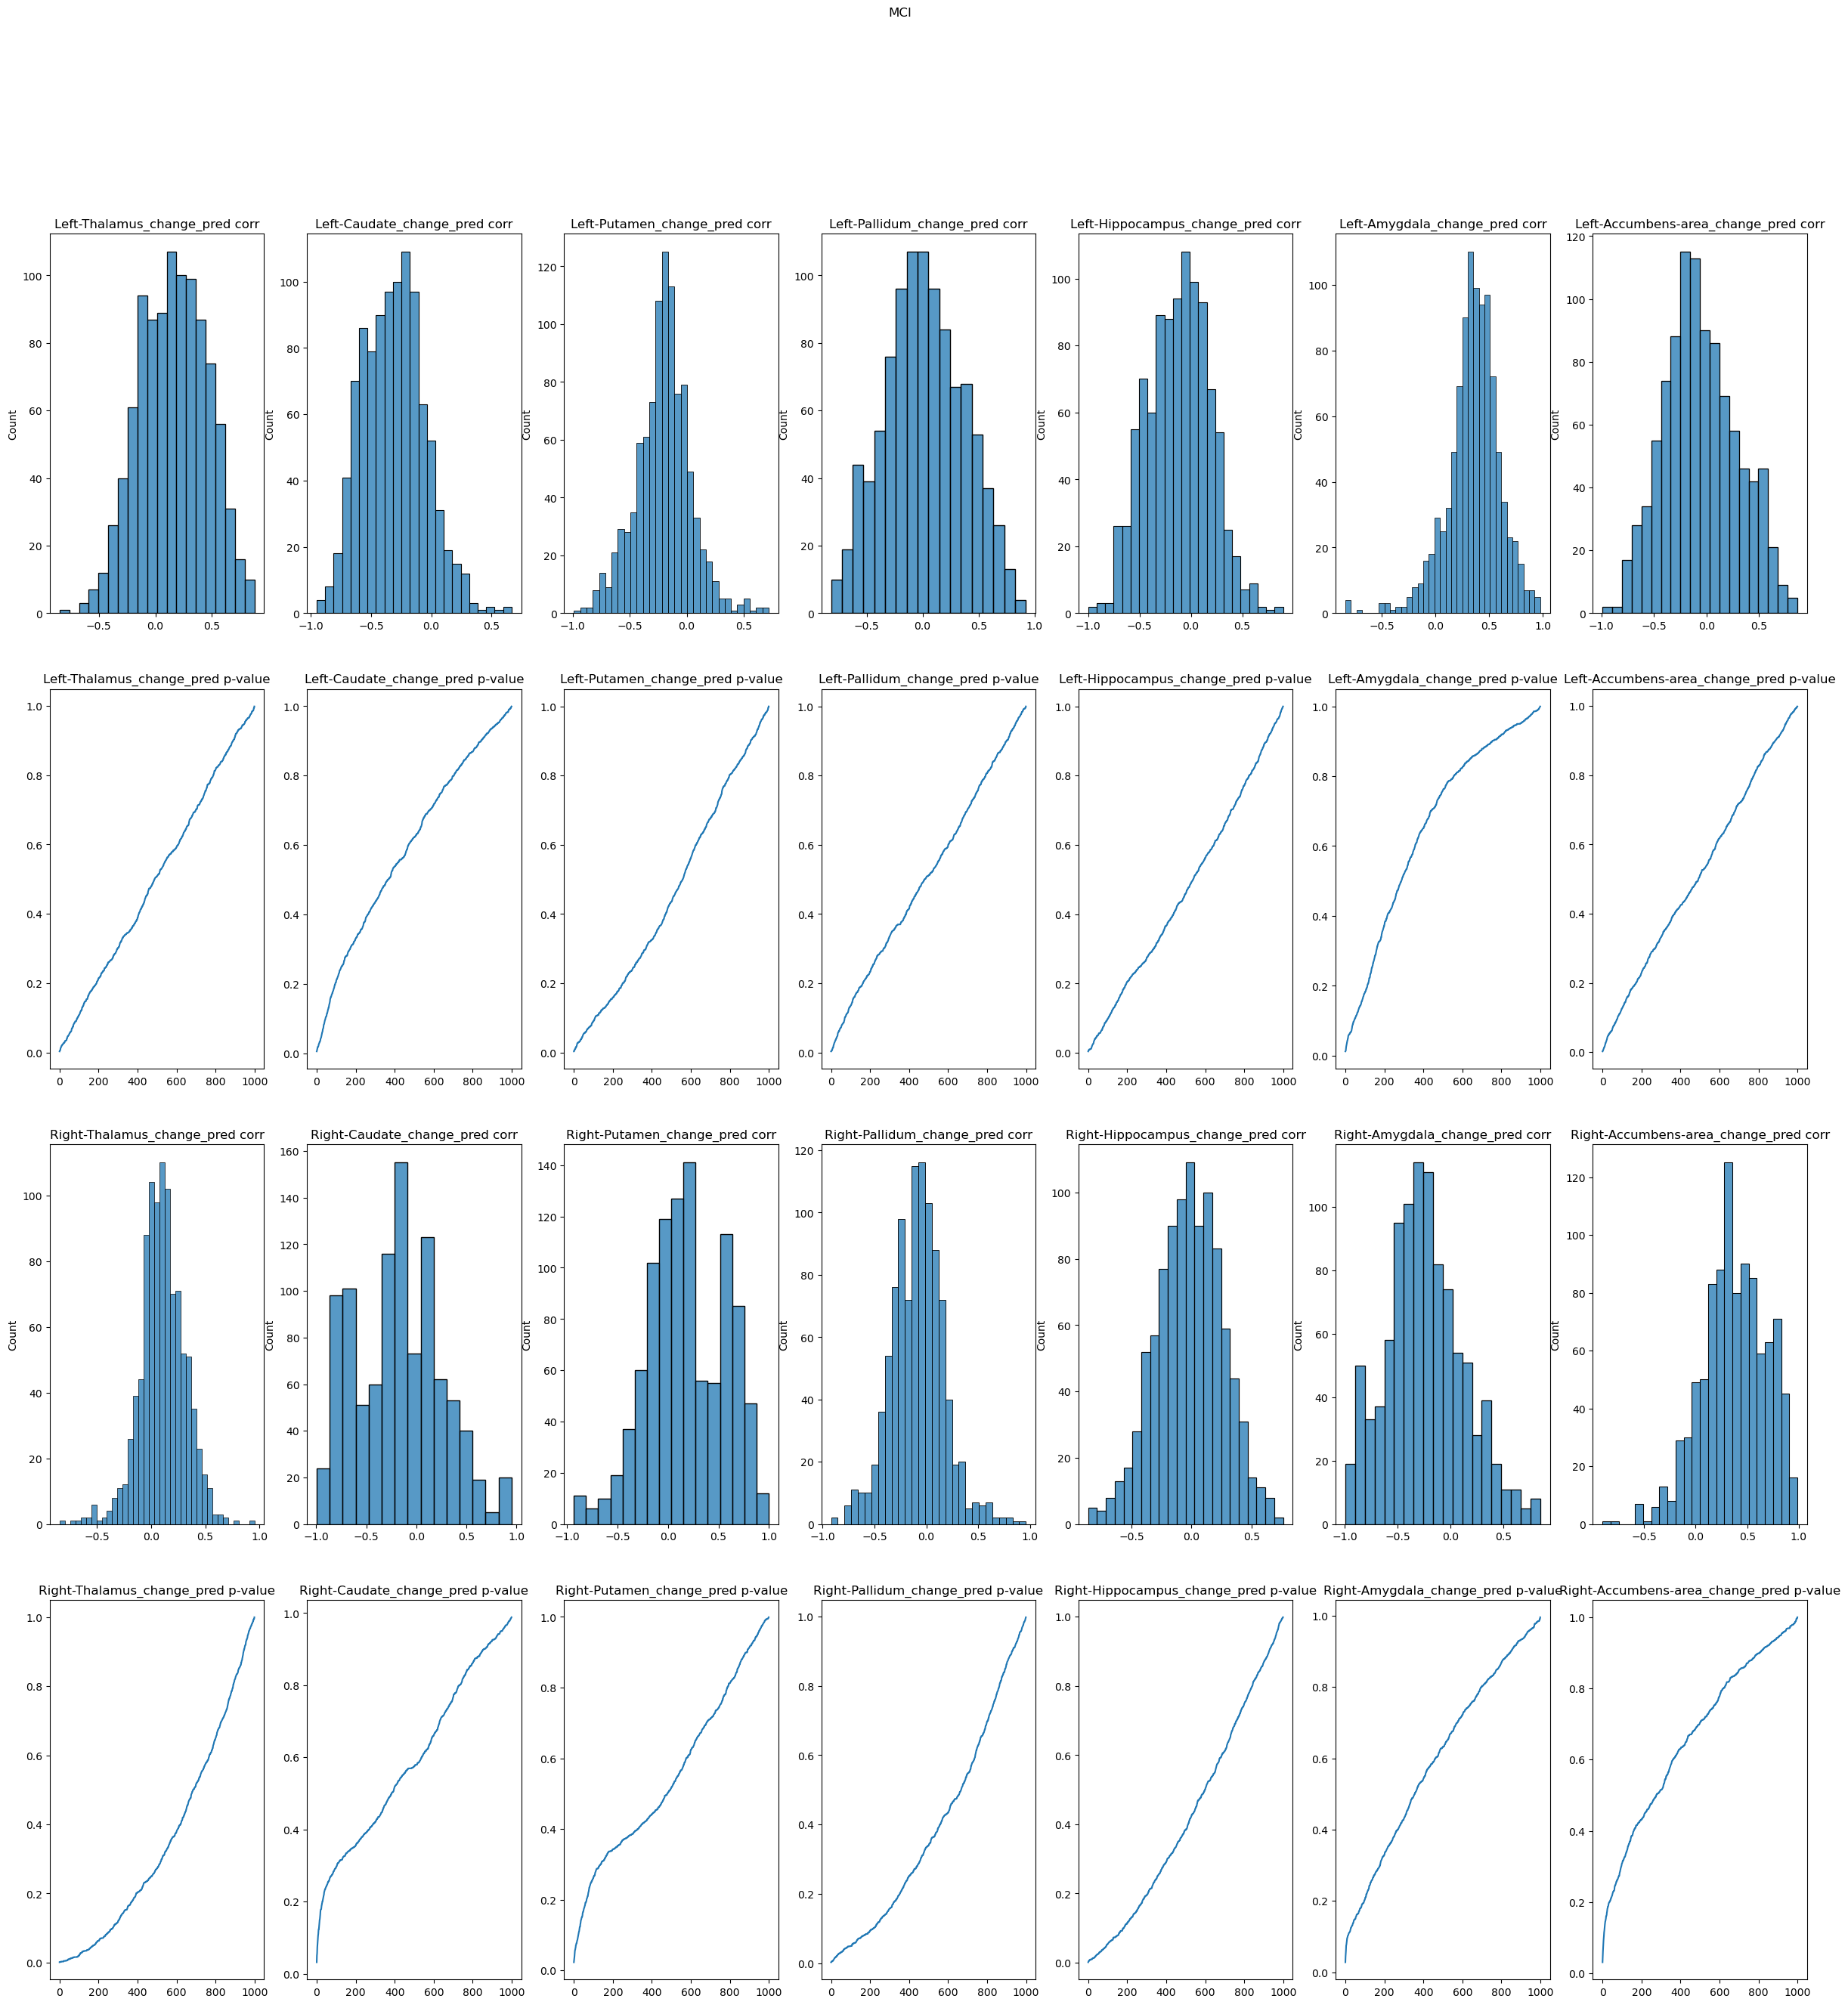

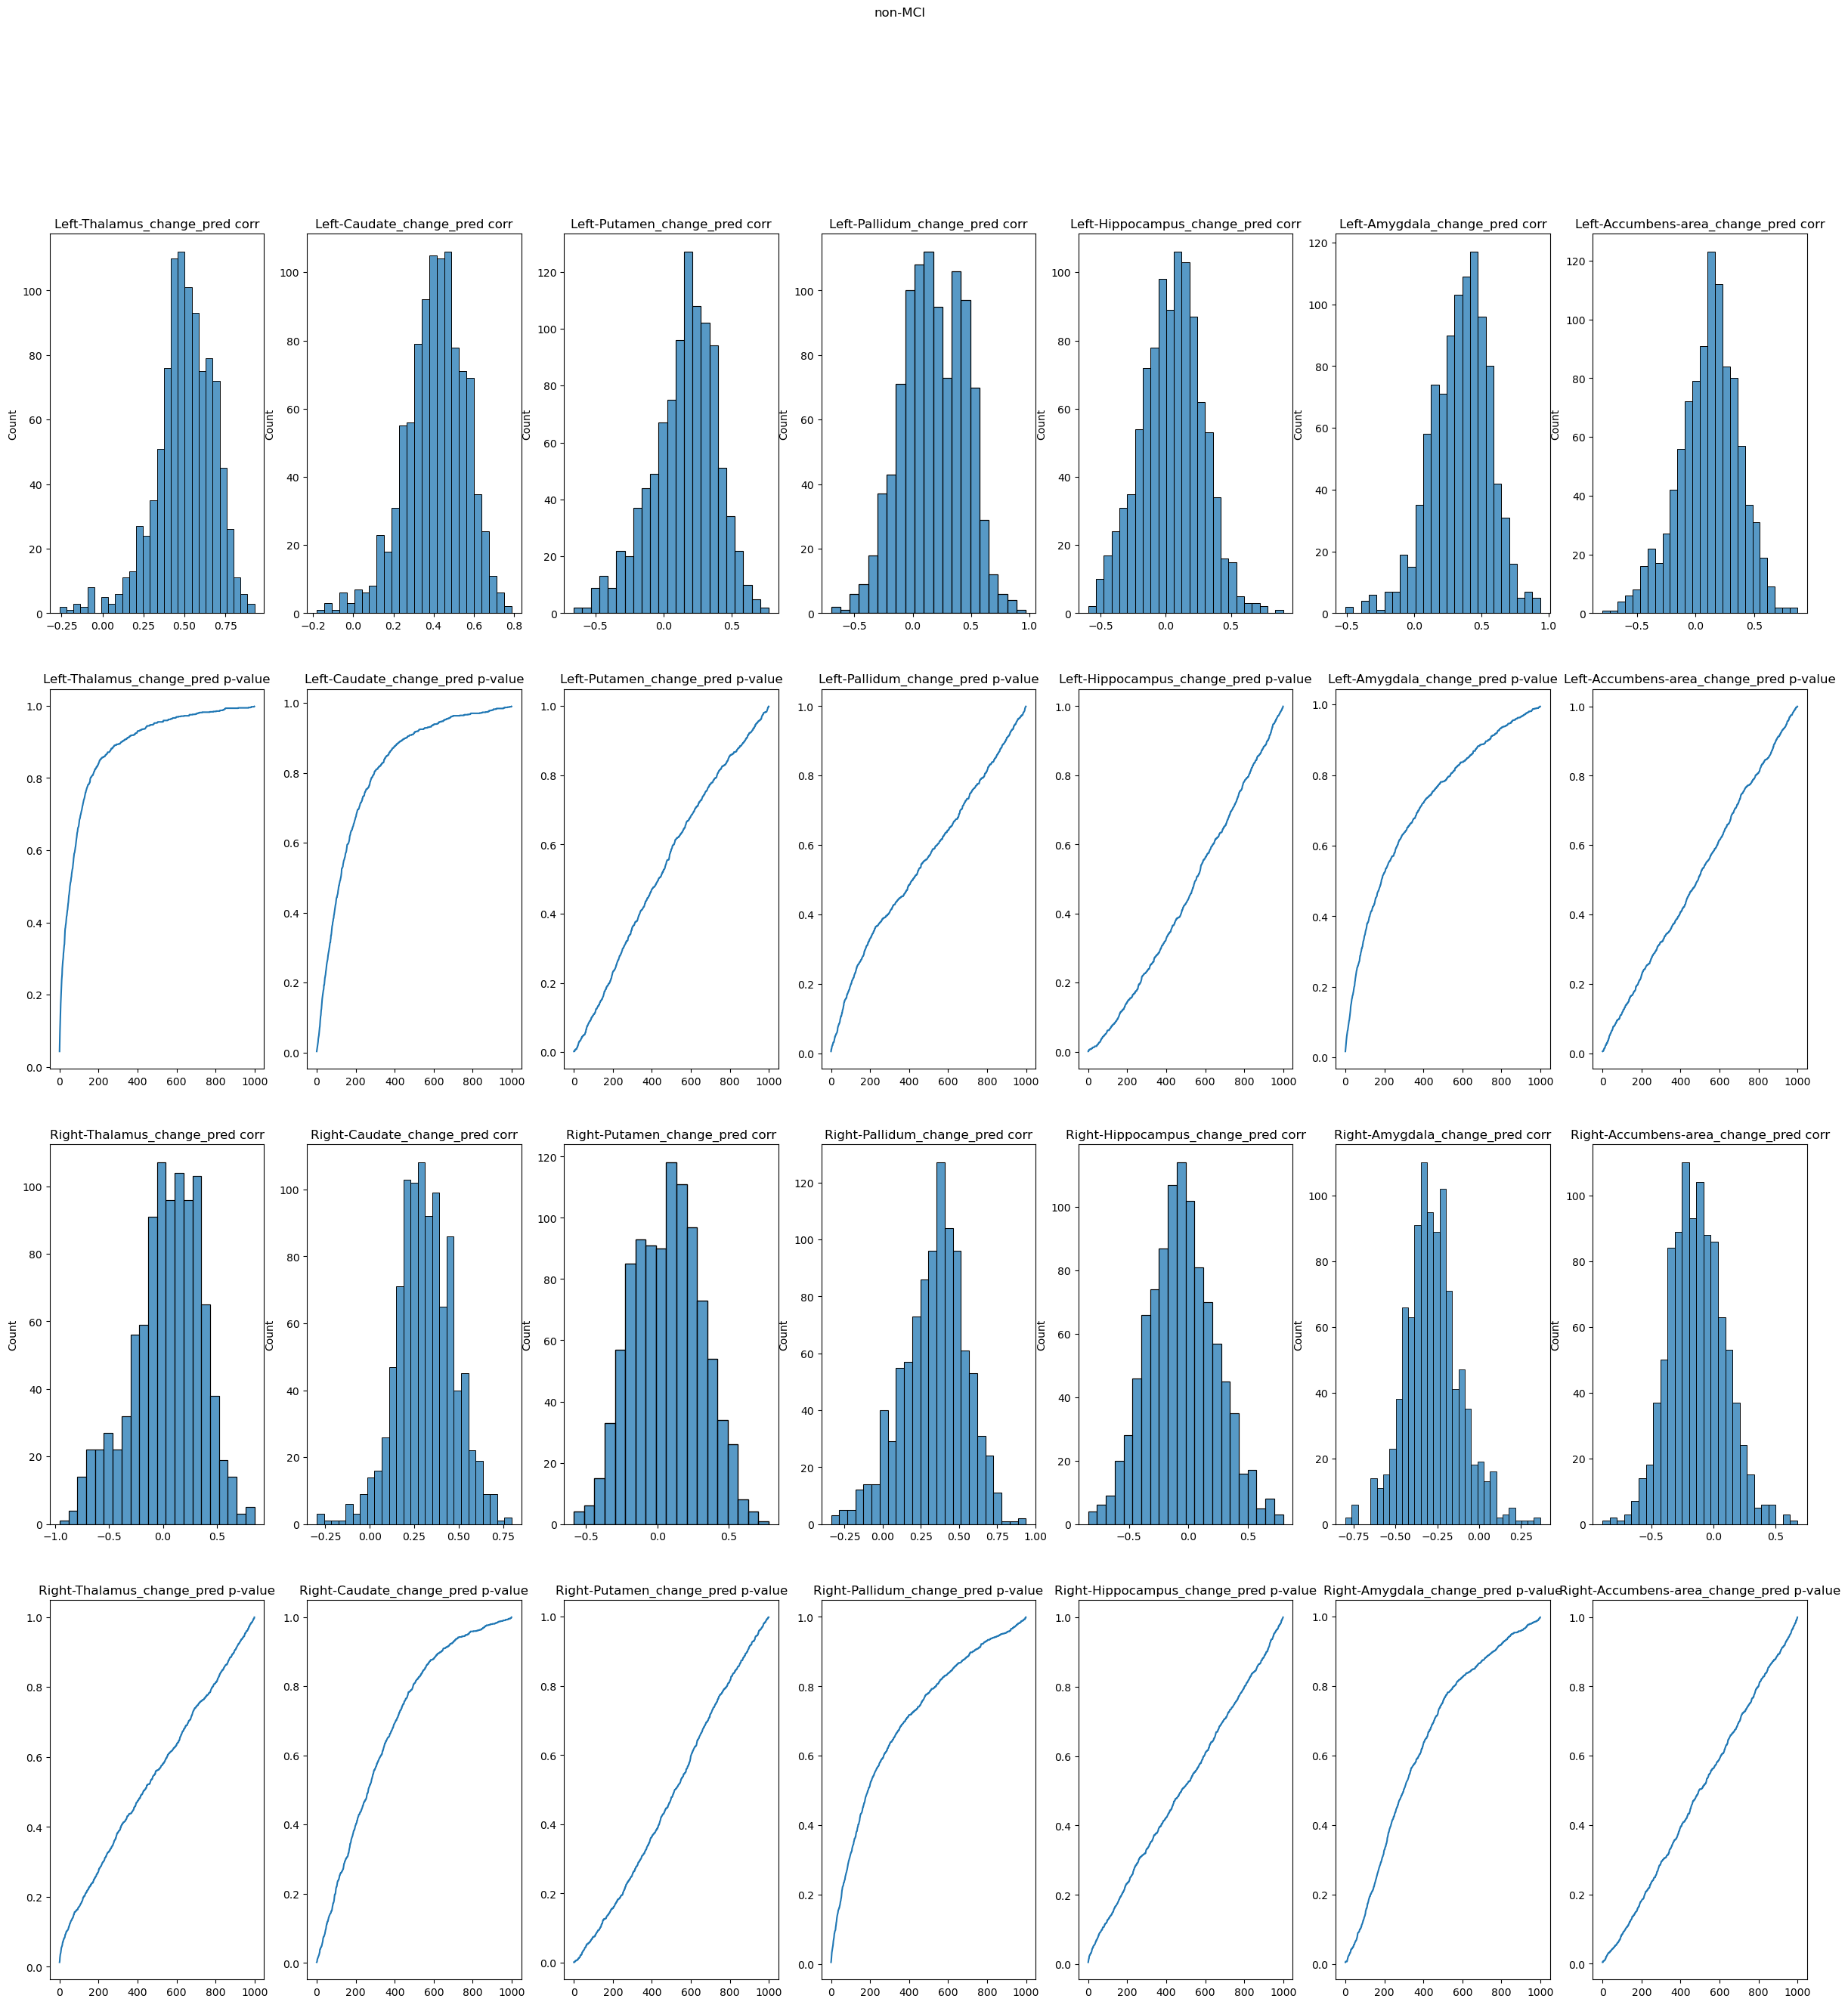

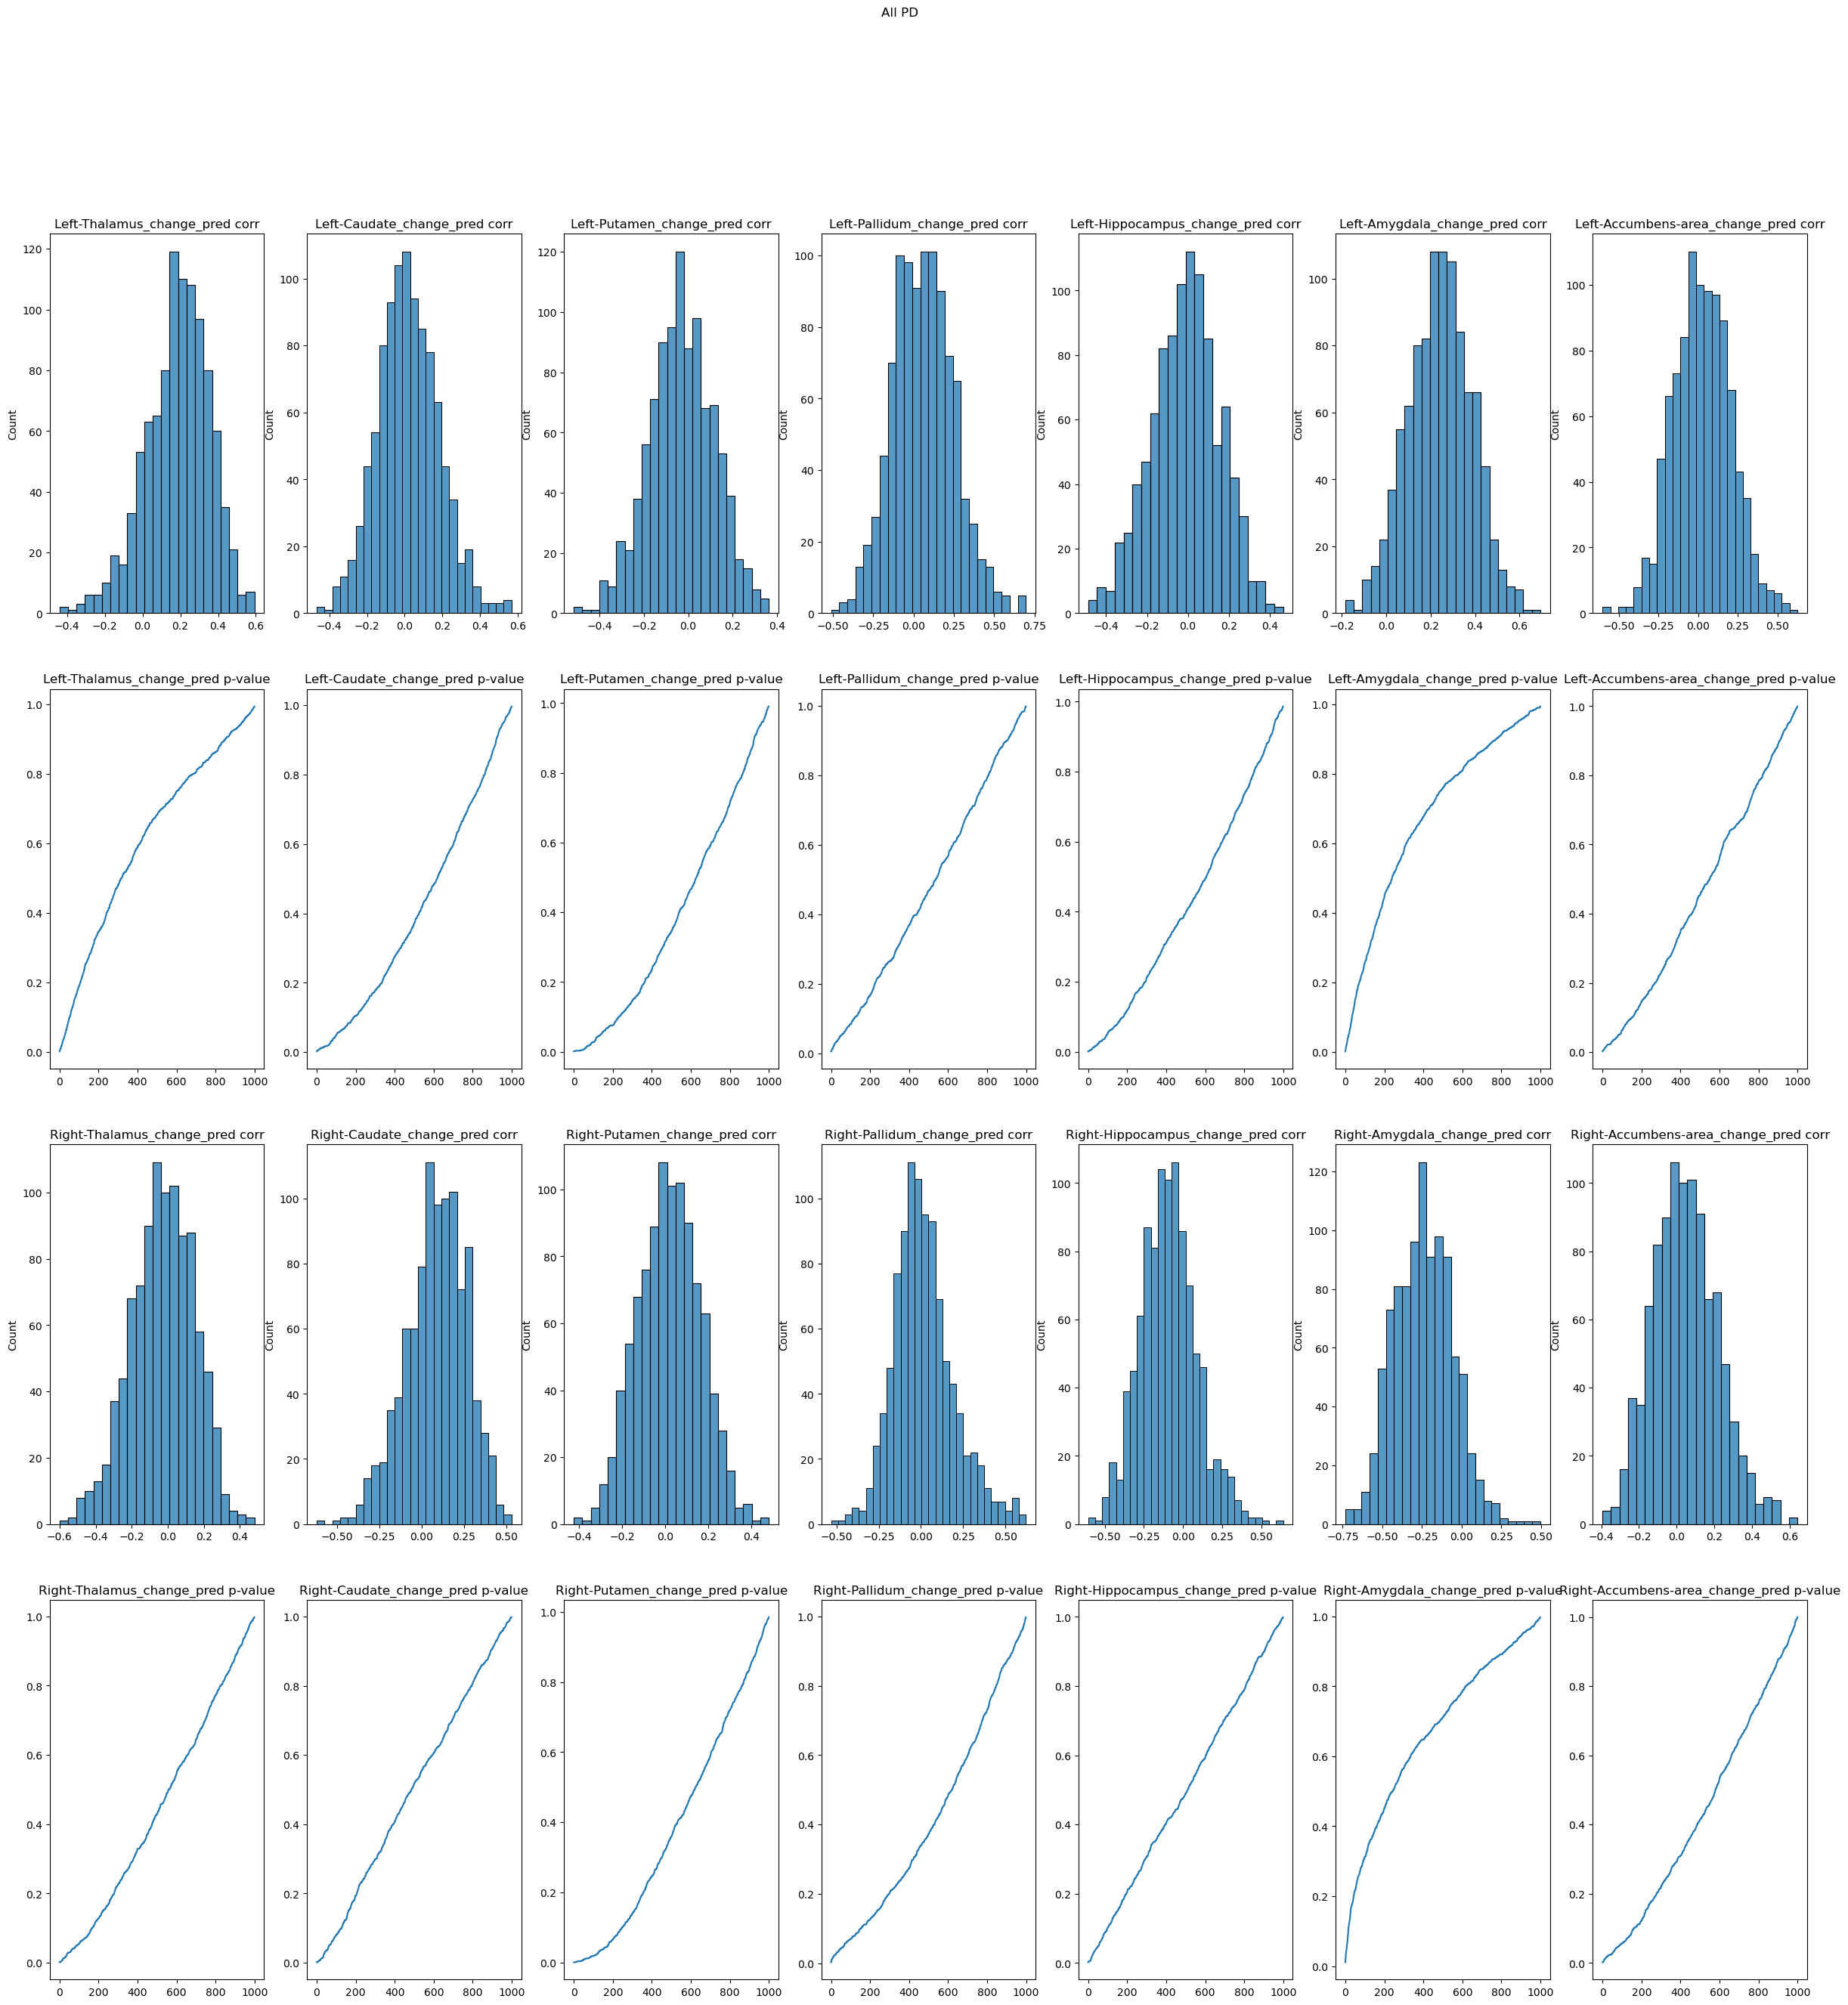

In [70]:
np.cumsum(hist*np.diff(bin_edges)).shape

(10,)

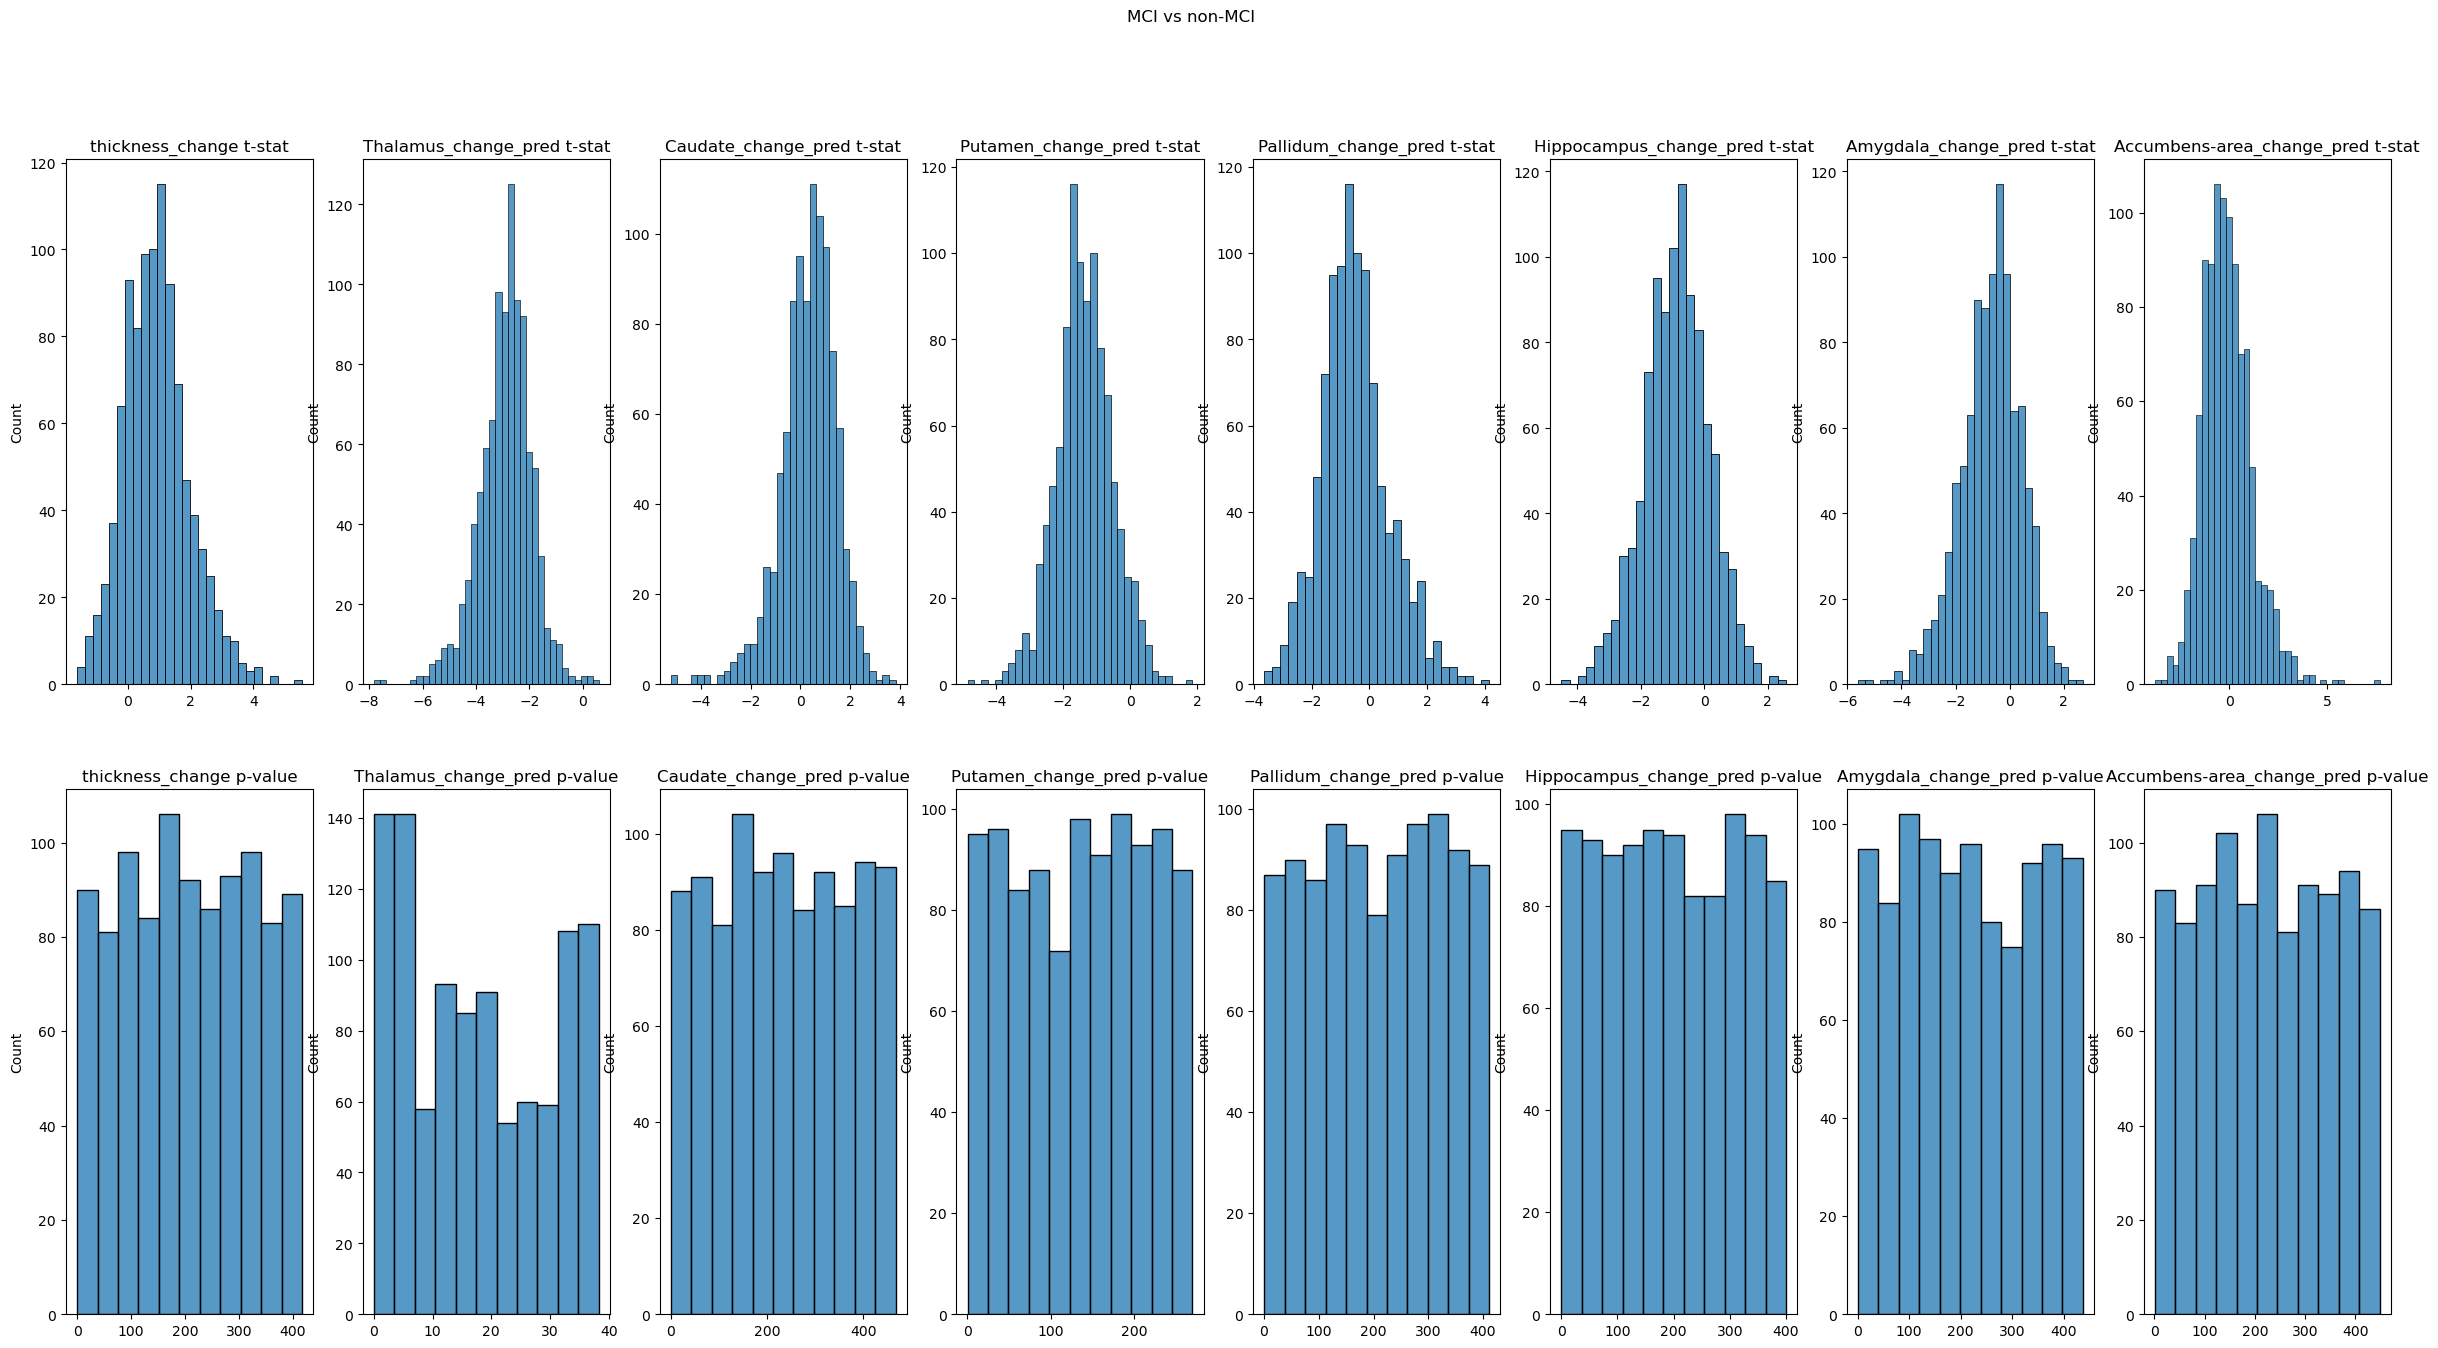

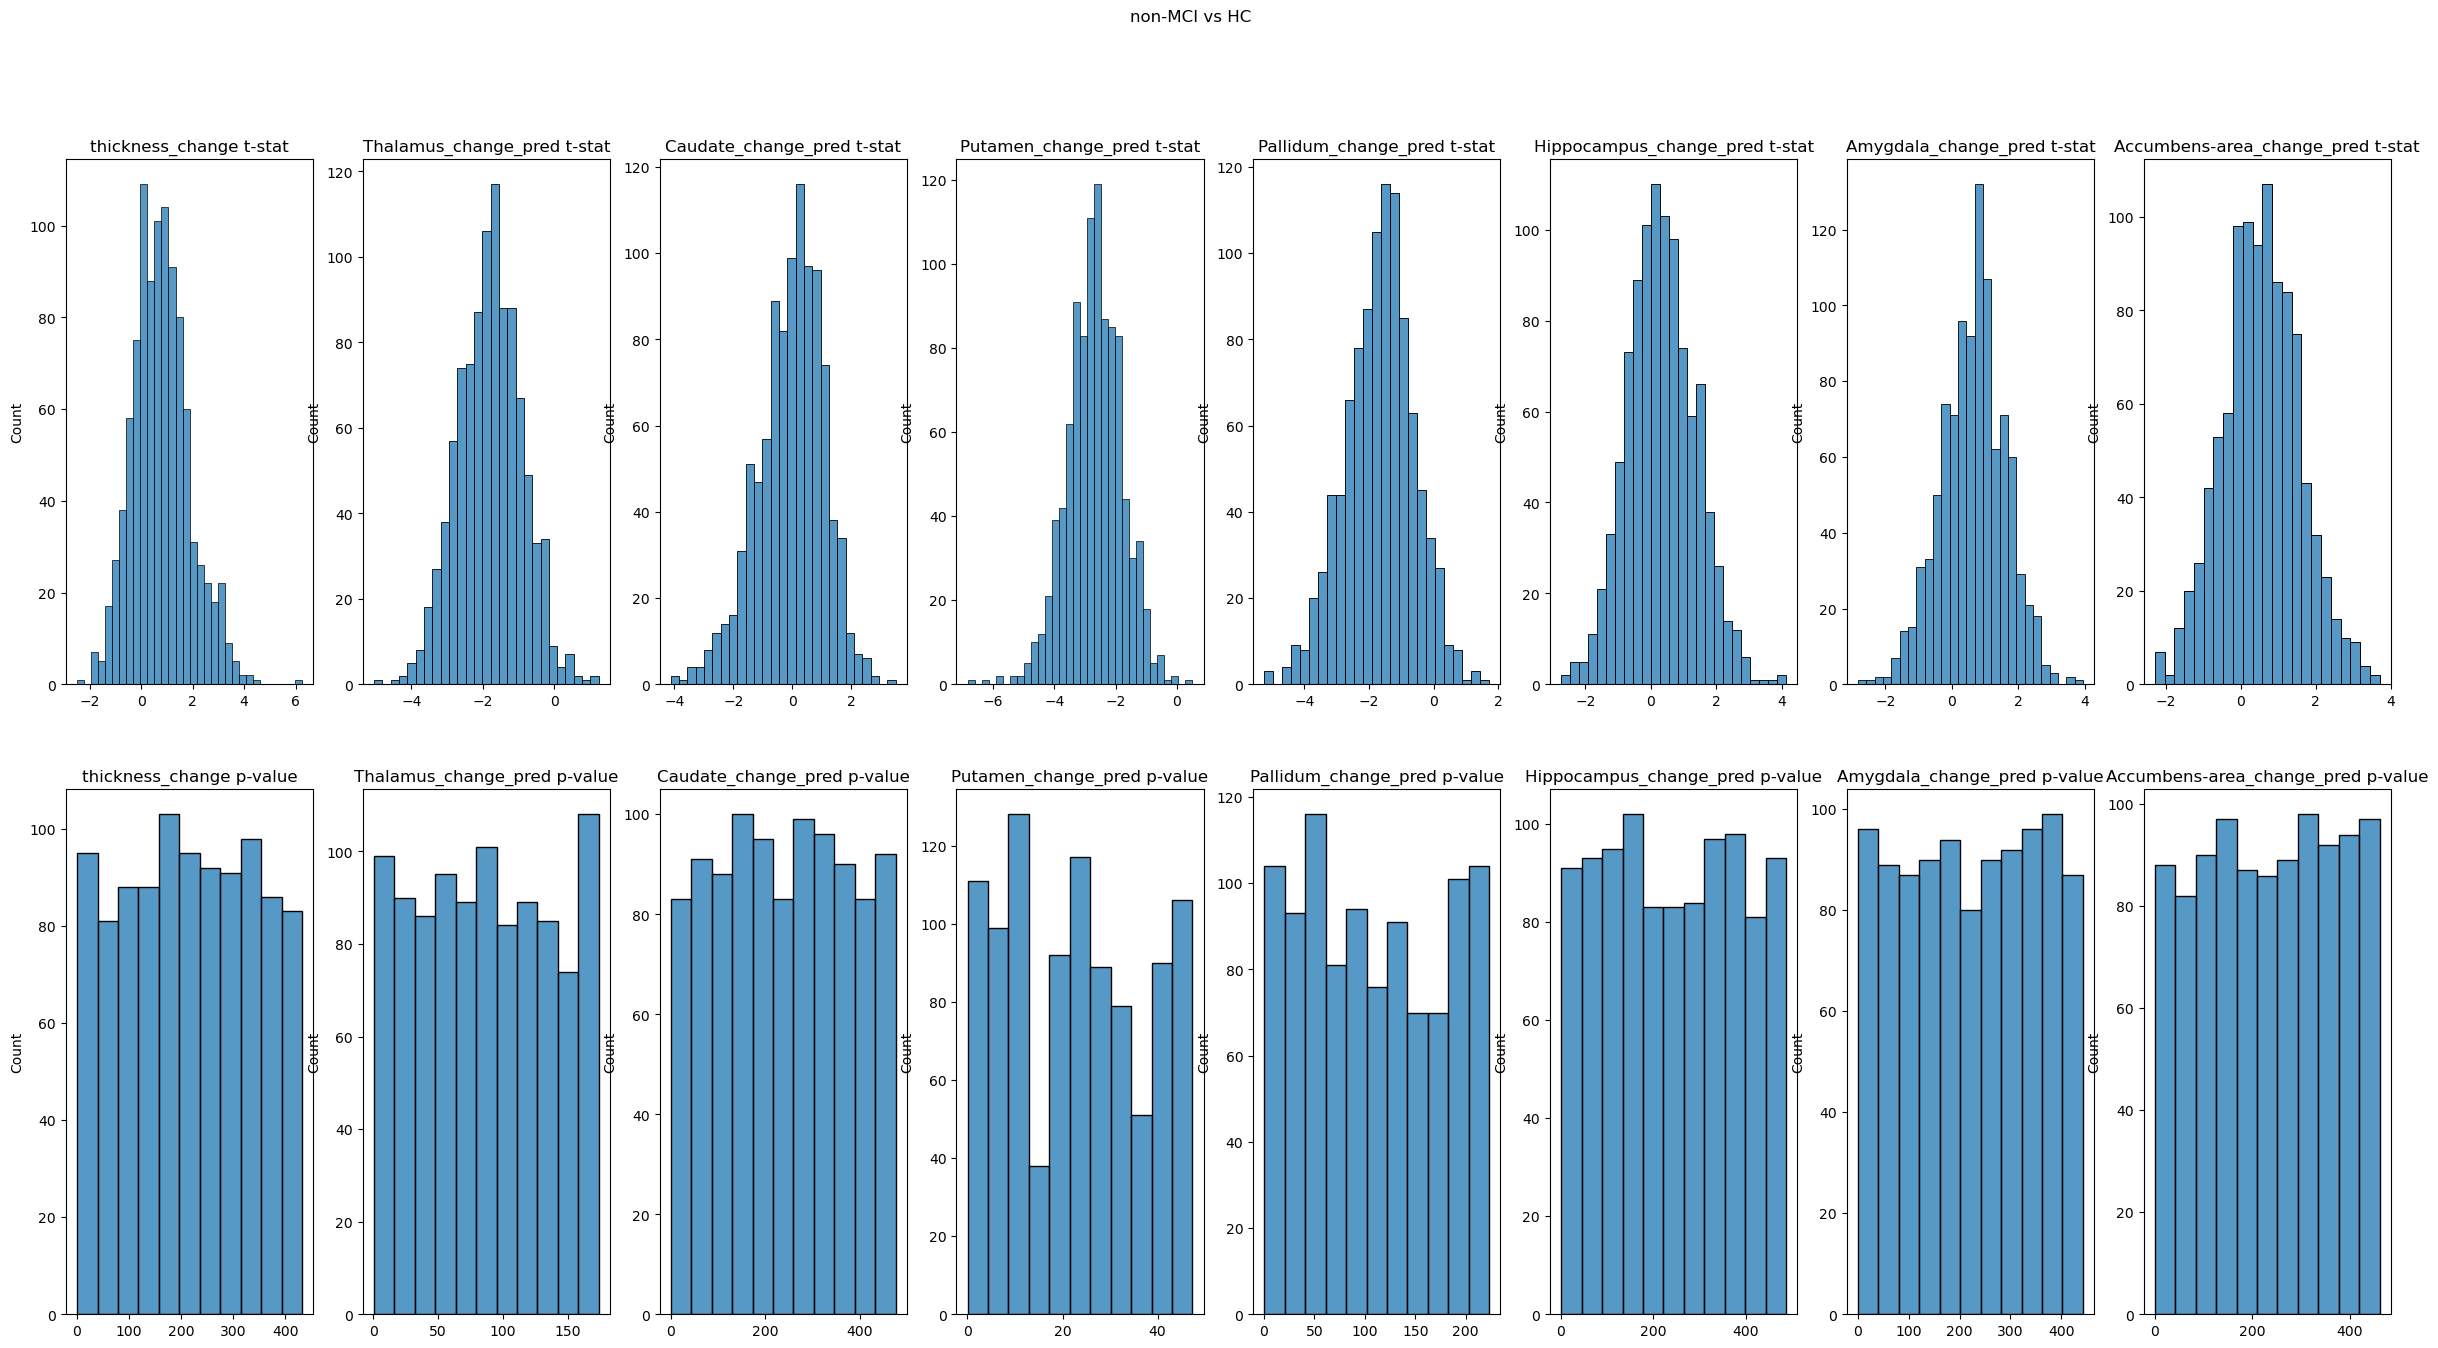

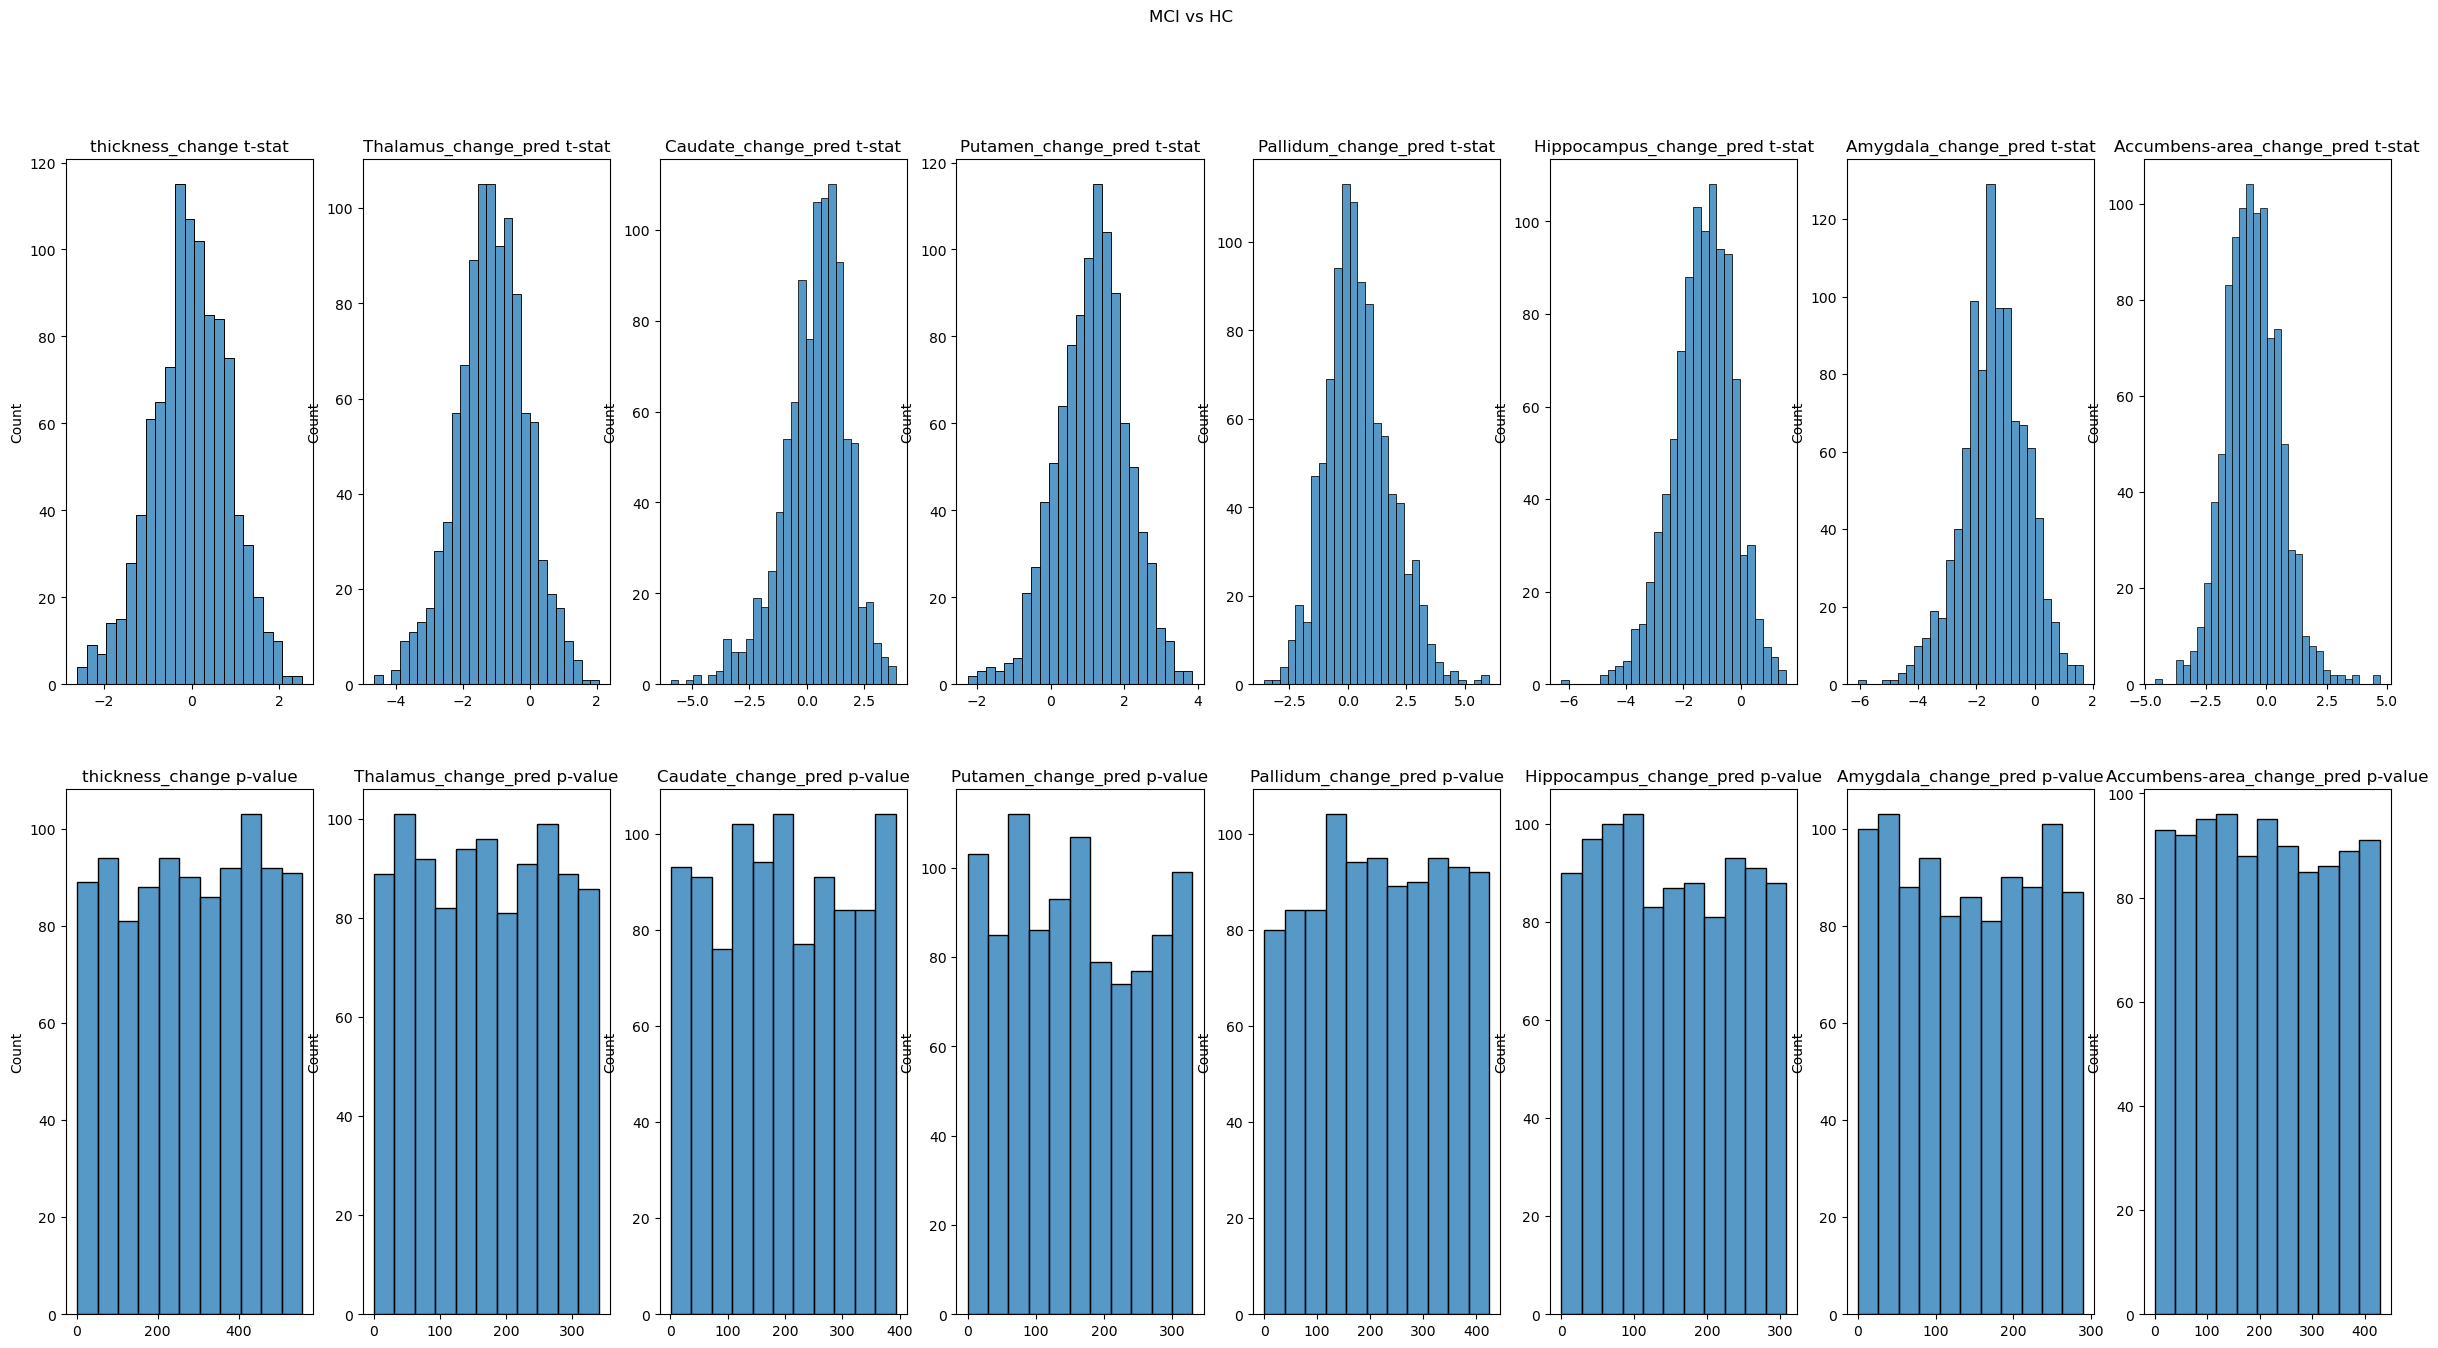

In [57]:
titles = ["MCI vs non-MCI", "non-MCI vs HC", "MCI vs HC"]
stats = [MCIvsnonMCI_stats, nonMCIvsHC_stats, MCIvsHC_stats]

for i in range(3):
    f, ax = plt.subplots(nrows=2, ncols=n_regions, figsize=(30, 15))
    f.suptitle(titles[i])
    for j in range(n_regions):
        ax[0,j].set_title(target_columns[j] + " t-stat")
        ax[0,j] = sns.histplot(stats[i][j, :, 0], ax=ax[0,j])
        ax[1,j].set_title(target_columns[j] + " p-value")
        ax[1,j] = sns.histplot(np.cumsum(stats[i][j, :, 1]), ax=ax[1,j])

In [42]:
target_columns

['Thalamus_change_pred',
 'Caudate_change_pred',
 'Putamen_change_pred',
 'Pallidum_change_pred',
 'Hippocampus_change_pred',
 'Amygdala_change_pred',
 'Accumbens-area_change_pred']